# Refinitiv Academic Article Series:
# Economics and Finance 101:
# Computing Risk Free Rates and Excess Returns ($r_f$) Part 2: From Sovereign Coupon-Paying-Bonds (and Bootstrapping / Spot Rates / Discount-Factors)

Our [previous article](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds) explained what *Net Present Values*, *Face Values*, *Maturities*, *Coupons*, and *risk-free rates* are, how to compute them, and how they are used to calculate *excess returns* using only [Zero-Coupon Bonds](https://www.investopedia.com/terms/z/zero-couponbond.asp); in this article, we look at Coupon Paying Bonds, particularly *Cash Flow* incurred by Coupons, *Bootstrapping* and particularities about *Sovereign Bond* data. Very little is changed in this article until the '[Coupon Paying Rate](#CouponPayingRate)' section. It is aimed at academics from undergraduate level up, and thus will explain all mathematical notations to ensure that there is no confusion and so that anyone - no matter their expertise on the subject - can follow.

One may find many uses for the methods outlined below. For example: To calculate metrics such as the [Sharpe-Ratio](https://www.investopedia.com/terms/s/sharperatio.asp), one needs first to calculate *excess returns*, that then necessitates the calculation of *risk-free rates of return*.

## Use of Government Bonds in calculating risk-free rates <a class="anchor" id="UseofGovernmentBondsincalculatingriskfreerates"></a>

As afformentioned in our [previous article](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds), only certain banks have access to the primary sovereign bond markets where they may purchase Domestic Sovereign/Government Bonds. There are many such types of bonds. Among others, there are:


- United States (US): US Treasury securities are issued by the US Department of the Treasury and backed by the US government.
    - Fixed principal: A principal is the amount due on a debt. In the case of bonds, it is often referred to as the Face Value. The Face Value of all US Treasury securities is 1000 US Dollars (USD)
        - Treasury‐bills (as known as (a.k.a.): T-bills) have a maturity of less than a year (< 1 yr). These are bonds that do not pay coupons (**Zero-Coupon Bonds**).
        - Treasury‐notes (a.k.a.: T‐notes) have a maturity between 1 and 10 years (1‐10 yrs).
        - Treasury-bonds (a.k.a.: T‐bonds)  have a maturity between 10 and 30 years (10‐30 yrs). It is confusing calling a sub-set of bonds 'T-bonds', but that is their naming conventions. To avoid confusion, I will always refer to them explicitly as Treasury-bonds (or T‐bonds), not just bonds.
    - Inflation‐indexed: TIPS
    - Treasury STRIPS (created by private sector, not the US government)


- United Kingdom: Since1998, gilts have been issued by the UK Debt Management Office (DMO), an executive agency of the HMT (Her Majesty's  Treasury).
    - Conventional gilts: Short (< 5 yrs), medium (5‐15 yrs), long (> 15 yrs)
    - Inflation‐indexed gilts


- Japan
    - Medium term (2, 3, 4 yrs), long term (10 yrs), super long term (15, 20 yrs)


- Eurozone government bonds


There are several ways to compute risk-free rates based on bonds. In this article, we will focus on T-bills, as US Sovereign Bonds are often deemed the safest (which is a reason why the USD is named the [world's reserve currency](https://www.investopedia.com/articles/forex-currencies/092316/how-us-dollar-became-worlds-reserve-currency.asp#:~:text=Standing%20on%20Its%20Own%20as,accumulated%20reserves%20of%20U.S.%20dollars.)) and T-bills are an example of Zero-Coupon Bonds (as per [the method outlined by the Business Research Plus](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)). From there, a risk-free rate of return can be computed as **[implied by its bond's Yield To Maturity](#1)** and **[based the change in the same bond's market price from  one day to the next](#2)**.

$$ \\ $$
## YTM of Coupon Paying Bonds <a class="anchor" id="1"></a>

### US Treasury Securities: Generalised <a class="anchor" id="USTreasurySecuritiesGeneralised"></a>

A bond is a debt; a debt with the promise to pay a [Face Value](https://www.investopedia.com/terms/f/facevalue.asp) ($FV$) in $m$ years (m for maturity) in the future as well as [Coupons](https://www.investopedia.com/terms/c/coupon.asp) (summing to $C$ every year) for an amount today. That latter amount paid for the bond may be fair; a fair value at time of the Bond's issue ($t$) is calculated as its [Net Present Value](https://www.investopedia.com/terms/n/npv.asp) ($NPV$) such that:

$$ NPV_{f_{\text{acf}}, t} = 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}}} + \sum^{^\frac{m}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{FV_t + m \text{ } C}{\left(1 + \text{ } m \text{ } YTM_t\right)} & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

where $YTM$ is the annualised [Yield To Maturity](https://www.investopedia.com/terms/y/yieldtomaturity.asp) of the Bond in question and $f_{\text{acf}}$ is the annual [compound](https://www.investopedia.com/terms/c/compounding.asp#:~:text=Compounding%20is%20the%20process%20whereby,called%20%22miracle%20of%20compounding.%22) frequency (such that if we compound cash flows annually, $f_{\text{acf}} = 1$; and if we compound cash flows bi-annually (*i.e.*: twice a year / every 6 months), $f_{\text{acf}} = 0.5$).

#### Annual Coupon Payment Frequency <a class="anchor" id="AnnualCouponPaymentFrequency"></a>
Coupons are paid at a fixed 'annual Coupon payment frequency' ($f_{ac \mathbf{p} f}$). Usually, the following are true:
- $f_{ac \mathbf{p} f} = 0.5$, *i.e.*: Coupon payments are made every 6 months (*i.e.*: semi-annually)
- $f_{\text{acf}}$ is set to the $f_{ac \mathbf{p} f}$ such that $f_{ac \mathbf{p} f} = f_{ac \mathbf{p} f}$
- Thus $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Sub-Annual Interpolation of YTMs <a class="anchor" id="SubAnnualInterpolationofYTMs"></a>
Note that when using YTM values inter-year (*e.g.*: after 6 month), we then use a fraction of it, i.e.: $f_{\text{acf}} \text{ } YTM$. This is because all YTM values are annualised and - in accounting standards - *sub-annual* interpolation of YTMs are always [linear/arithmetic](https://en.wikipedia.org/wiki/Linear_interpolation#:~:text=In%20mathematics%2C%20linear%20interpolation%20is,set%20of%20known%20data%20points.). It must be remembered - however - that *super-annual* (*i.e.*: more than a year) extrapolation of YTMs are not nessesarily linear/arithmetic.

#### Compounding <a class="anchor" id="Compounding"></a>


It follows from the above that if $f_{\text{acf}} = 1$ such that we use an anually compounding accounting method, *annual* extrapolation of YTMs are [geometric](https://www.investopedia.com/articles/investing/071113/breaking-down-geometric-mean.asp).


Since Coupons are most often paid bi-annually, it **is common standard to compound cashflows bi-annually** too when they involve Bonds - [as aformentioned](#AnnualCouponPaymentFrequency). This is done to model a Bond-holding-[agent](https://en.wikipedia.org/wiki/Agent_(economics)) who re-invests Coupon payments as soon as they're received. In this senario, $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Discount Factor <a class="anchor" id="DiscountFactor"></a>
It is easy to see that NPVs and YTMs are therefore (inversely) related; if one changes, the other must change too. We may - therefore - equivalently speak about a change in NPV and a change in YTM since the FV (for each sovereign bond [issuer](https://www.investopedia.com/terms/i/issuer.asp)) does not change. The YTM acts as the [discount factor](https://www.investopedia.com/terms/d/discountrate.asp) here; as a matter of fact, we can see that the YTM is the annual growth rate of our NPV that leads it to the FV in the following:

$$ FV_t  = 
    \begin{Bmatrix}
         \left[ NPV_{f_{\text{acf}}, t} - \sum^{^\frac{m}{f_{acf}}}_{\tau=1} {\frac{f_{acf} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} \right] \text{ } \left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}} & \text{if } m \geq f_{\text{acf}} \\
         \\
         NPV_{f_{\text{acf}}, t} \text{ } {\left(1 + \text{ } m \text{ } YTM_t\right)} - m \text{ } C & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

#### Comparability

NPVs of different bonds are not comparable. That is because they account for bonds maturing at different times. Instead, YTMs of different bonds are comparable because they are annualised, therefore they account for different maturities. It is thus preferable to only speak of changes in sovereign bond NPVs in terms of the change in their YTMs; then we can compare them to each other, *e.g.*: in a Yield Curve (that can be seen [here](https://emea1.apps.cp.thomsonreuters.com/web/Explorer/EVzCURVEzFIxOV.aspx?s=0%23USBMK%3D&st=RIC) with Refinitiv credentials):

<img src="/content/dam/devportal/articles/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds/yieldcurve.PNG">

#### A Note on Maturities
It happens to be that we can easily formulate NPV (and FV) in the two cases where $m \geq 1$ and $m < 1$  because all maturities greater than 1 are a multiple of 1 (*i.e.*: they are whole numbers) (*i.e.*: no maturities past 1 year stop mid year, *e.g.*: 10 years and 6 months).

#### Coupon Paying Rate <a class="anchor" id="CouponPayingRate"></a>

If the Coupon is stated as an annual percentage, $\mathcal{C}_p$, of the Face Value (as it usually is), then:

$$ C = \mathcal{C}_p \text{   } \text{   } FV$$

### T-Note Example: Five Year T-Note with Semi-Annual Compounding

Using a semi-annual compounding accounting method (such that $f_{\text{acf}} = 0.5 = f_{\text{acpf}}$), a T-Note that matures in 5 Years (Five-Year T-Bill, FYTN) has a Net Present Value (${NPV}_{\text{FYTN}, f_{\text{acf}}, t}$) of ${NPV}_{\text{FYTN}, 0.5, t}$ at time t such that:

$$  \begin{array}{ll}
{NPV}_{\text{FYTN}, 0.5, t} &= 
    \begin{Bmatrix}
         \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^\frac{m_{\text{FYTN}}}{0.5}} + \sum^{^\frac{m_{\text{FYTN}}}{0.5}}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{if } m_{\text{FYTN}} \geq 0.5 \\
         \\
         \frac{FV_{\text{FYTN}, t} + m_{\text{FYTN}} \text{ } C_{\text{FYTN}} }{\left(1 + \text{ } m_{\text{FYTN}} \text{ } YTM_{\text{FYTN}, t}\right)} & \text{if } m_{\text{FYTN}} < 0.5
     \end{Bmatrix}\\
     \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^\frac{5}{0.5}} + \sum^{^\frac{5}{0.5}}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } m_{\text{FYTN}} = 5 > 0.5 \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } C_{\text{FYTN}}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } \frac{5}{0.5} = 10 \\
&= \frac{FV_{\text{FYTN}, t}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, t}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } C_{\text{FYTN}} = \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, t} \\
% &= \frac{1000 \text{U.S.D.}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, t}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } 1000 \text{U.S.D.}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, t})^{\tau} }} & \text{since } FV_{\text{FYTN}, t} = 1000 \text{U.S.D.} \\
\end{array}$$


Let's have a look at data from "2020-07-31":

In [1]:
# We need to gather our data. Since Refinitiv's DataStream Web Services (DSWS) allows for access to the most accurate and wholesome end-of-day (E.O.D.) economic database (DB), naturally it is more than appropriate. We can access DSWS via the Python library "DatastreamDSWS" that can be installed simply by using  pip install .
import DatastreamDSWS as DSWS

# We can use our Refinitiv's Datastream Web Socket (DSWS) API keys that allows us to be identified by Refinitiv's back-end services and enables us to request (and fetch) data:
DSWS_username = open("Datastream_username.txt", "r")  # The username is placed in a text file so that it may be used in this code without showing it itself
DSWS_password = open("Datastream_password.txt", "r")  # Same for the password
ds = DSWS.Datastream(username=str(DSWS_username.read()),
                     password=str(DSWS_password.read()))

# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
DSWS_username.close()
DSWS_password.close()

In [2]:
# Now let's get US Treasury Note (Maturing) 31/07/25:
fytn_Coupon_2020_07_31_p = ds.get_data( #  the ' _p ' is for 'price'
    tickers='613XGU', # found this ticker on https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+Note+31%2F07%2F25&prev=99_US+Treasury+Note+(Maturing)+31%2F07%2F25&nav_category=13
    start = "2020-07-29", fields="X", freq='D')

In [3]:
fytn_Coupon_2020_07_31_p.dropna().T

,Dates,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,...,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-09
Instrument,Field,,,,,,,,,,,,,,,,,,,,,
613XGU,X,99.9765,100.1016,100.2031,100.1484,100.2891,100.1328,100.1719,100.1016,100.0625,99.8672,...,98.7656,98.7813,98.7188,98.8515,98.9765,99.0078,98.9063,98.7109,98.5469,98.4688


In [4]:
fytn_Coupon_2020_07_31_p.loc["2020-07-30"]

Instrument  Field
613XGU      X        100.1016
Name: 2020-07-30, dtype: float64

We can see that the price on "2020-07-31" was \$100.1016, so it was selling at a premium. We are using '[613XGU](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=613XGU&prev=99_TRUS5YT&prev_csrc=8)' instead of '[TRUS5YT](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=TRUS5YT&prev=99_)' as the latter is the YTM given for sovereign provided bonds which one cannot actually buy - only investment banks can purchse such bonds. (Many pension funds and asset managers hold sovereign bonds, but investment banks are the institutions who trade them.) Here instead we are looking at sovereign bonds sold by the investment bank 'Deutsche Boerse AG'. This means that, in our equation, we'd use the realised price of \\$100.1016 instead of the ${NPV}_{\text{FYTN}, 0.5, "2020-07-31"}$.

In [5]:
# Now let's get US Treasury Note (Maturing) 31/07/25:
fytn_Coupon_2020_07_31_f = ds.get_data(  # the ' _f ' is for 'fixed', as in fixed data.
    tickers='613XGU',  # found this ticker on https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+Note+31%2F07%2F25&prev=99_US+Treasury+Note+(Maturing)+31%2F07%2F25&nav_category=13
    kind=0,  # ' kind=0 ' is needed here as we are looking for static data that doesn't change with time.
    fields=["NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL", "EXCHB", "DEF",
            "MPD.U", "BTYP", "AIS", "BAB"])
fytn_Coupon_2020_07_31_f.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Instrument,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU,613XGU
Datatype,NAME,ID,TERM,RV,C,CTYP,RDL,EXCHB,DEF,MPD.U,BTYP,AIS,BAB
Value,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,FF MU DD,MPD,%,STR,54568290,5
Dates,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09,2021-08-09


From the above we can note that the Issuing Date (```ID```) is 2020-07-31 with a maturity (also known as (a.k.a.) ```Term```) of 5 years, thus a Last Redemption Date (```RDL```) of 2025-07-31, a Face Value (a.k.a. "Redemption Value" - ```RV```) of \\$100, and a Fixed Coupon Rate of 0.25\% - which is quite low. We have a [Straight (cash flows are fixed)](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&dt=true&q=BTYP&prev=dtx1%7C0001_0001_0001&subset=dtx1%7C0001_0001_0001&nav_frequency=Static) (```BTYP```) debt of which 54568290 (```AIS```) [was sold in the currency and time of issue](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&dt=true&q=AIS&prev=dtx1%7C0001_0001_0001&subset=dtx1%7C0001_0001_0001&nav_frequency=Static) with [daily accrural basis](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&dt=true&q=BAB&prev=dtx1%7C0001_0001_0001&subset=dtx1%7C0001_0001_0001&nav_frequency=Static). (We can also see the exchanges where our security was listed, shown as [Codes](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&dt=true&q=exchange&prev=dtx1%7C0001_0001_0001&subset=dtx1%7C0001_0001_0001).) It is unusual to have T‐notes with Face Values other than \\$1000, but this is hat we're dealing with here. We thus now have:

$$  \begin{array}{ll}
\text{\$}100.1016 &= \frac{FV_{\text{FYTN}, "2020-07-31"}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, "2020-07-31"}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since we are using our realised price of \$100.1016 instead of the } {NPV}_{\text{FYTN}, 0.5, "2020-07-31"}\\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } \text{\$}100}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since } FV_{\text{FYTN}, "2020-07-31"} = \text{\$}100 \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 * \frac{0.25}{100} * \text{   } \text{   } \text{\$}100}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} & \text{since } \mathcal{C}_p = 0.25\% = \frac{0.25}{100} \text{ in this instance} \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} \\
\end{array}$$
since

In [6]:
0.5 * (0.25/100) * 100

0.125

Thus:

$$ \begin{array}{ll}
0 &= \frac{FV_{\text{FYTN}, "2020-07-31"}}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{0.5 \text{ } \mathcal{C}_p \text{   } \text{   } FV_{\text{FYTN}, "2020-07-31"}}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} - \text{\$}100.1016 & \text{ as per the above} \\
&= \frac{\text{\$}100}{\left(1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"}\right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{ } YTM_{\text{FYTN}, "2020-07-31"})^{\tau} }} - \text{\$}100.1016 & \text{ as per the above} \\
&\approx \frac{\text{\$}100}{\left(1 + 0.5 \text{   } * \text{   }  0.002295515059055049 \right)^{10}} + \sum^{10}_{\tau=1} {\frac{\text{\$}0.125}{ (1 + 0.5 \text{   } * \text{   }  0.002295515059055049)^{\tau} }} - \text{\$}100.1016 
\end{array}$$

as computed itteratively with the Python funcition ```YTM_Solver``` deffined bellow:

#### Computing Single YTM Values

In [53]:
from scipy import optimize # ' scipy ' is a scientific Python library. We will use it to find the optimal Yield in our non-closed equation.


def YTM_Solver(fv, c, m, p, f_acf, cash_flow_no_fv=None, cash_flow_with_fv=None, error=False):
    """YTM_Solver(fv, c, m, p, f_acf, cash_flow_no_fv=None, cash_flow_with_fv=None, error=False) Version 1.0
    This Python function calculates the yield to maturity for a sovereign bond, wether coupon paying or not.

    Dependencies
    ----------

    Python sub-library 'optimised' from 'scipy' version 1.6.2. Imported via following line:
    >>> from scipy import optimize

    Parameters
    ----------

    fv: int or float
        Face Value (also known as (a.k.a.) Redemption Value) of the bond.
        This has to be in the same currency as c and p.

    c: int or float
        Coupon that the bond pays every year - if any.
        This has to be in the same currency as fv and p.
        If the Bond doesn't pay Coupons, set it to 'None'.

    m: int or float
        Maturity (a.k.a.: Term) of the Bond in years - if any.
        If it is less than a year, express it in a fraction (e.g.: 6 months as 1/2).

    p: int or float
        Realised price of the Bond.
        This has to be in the same currency as fv and c.

    f_acf: int or float
          Annual compound frequency (such that if we compound cash flows annually, f_acf=1; and if we compound cash flows bi-annually (i.e.: twice a year / every 6 months), f_acf=0.5).
          Coupons are paid at a fixed 'annual Coupon payment frequency' (f_acPf). Usually, the following are true:
          - f_acPf = 0.5 , i.e.: Coupon payments are made every 6 months (i.e.: semi-annually)
          - f_acf is set to the f_acPf such that f_acPf = f_acf
          - Thus usually f_acPf = f_acpf = 0.5.

    cash_flow_no_fv: None or list
        Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be None.
        If ' cash_flow_no_fv ' and ' cash_flow_with_fv ' are set to None, then cash_flow is set to ' [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)] '.
        Else, ' cash_flow_no_fv ' needs to be a list of numbers (float or int) of each of the coupon payments - the last one needs to EXCLUDE the Face Value.

    cash_flow_with_fv: None or list
        Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be None.
        If ' cash_flow_no_fv ' and ' cash_flow_with_fv ' are set to None, then cash_flow is set to ' [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)] '.
        Else, ' cash_flow_no_fv ' needs to be a list of numbers (float or int) of each of the coupon payments - the last one needs to INCLUDE the Face Value.

    error: boolean
        If set to True and if the method used to compute the ytm is not infenitely precise (id est: if m > f_acf), then an error value away from the price of the bond is provided.
        Default: error=False


    Returns
    -------

    if the 'error' parameter is:
        - Set to False: YTM_Solver returns a float as the ytm.
        - Set to True: YTM_Solver returns a tuple of the ytm and the error. This is the eror in the price implied by the given ytm.

    Examples:
    --------

    >>> ytm_op, err = YTM_Solver(fv=100, c=0.25, m=5, p=100.1016, f_acf=0.5, error=True)
    >>> print(f"Our optimal YTM is {ytm_op} with an error of {err}")
    >>> 
    >>> Our optimal YTM is 0.002295515059055049 with an error of 1.2434497875801753e-14
    """

    if cash_flow_no_fv is None and cash_flow_with_fv is None:
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)])
    elif cash_flow_no_fv is not None and cash_flow_with_fv is None:
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
                [j/((1 + f_acf*ytm)**i) for i, j in enumerate(cash_flow_no_fv)])
    elif cash_flow_with_fv is not None and cash_flow_no_fv is None:
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return - p + sum(
                [j/((1 + f_acf*ytm)**i) for i, j in enumerate(cash_flow_with_fv)])
    else:
        print("Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be ' None '.")

    if m >= f_acf:  # Net Preset Values (NPVs) - and by extension Yields - of Bonds are valued with equations that depend on the relative value of their maturities and annual compound frequency.

        ytm_op = optimize.newton(  # the ' _op ' here stands for 'optimal'
            func=YTM_Equation,
            x0=0.002,  # I simply chose ' 0.002 ' after 3 trial and improvement rounds.
            args=(fv, c, m, p, f_acf))  # These stand for (respectively): fv, c, m, p and f_acf.

        err = (fv/((1 + (f_acf*ytm_op))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm_op)**i) for i in range(1, int(m/f_acf)+1)]) # YTM_Equation(ytm_op, fv, c, m, p, f_acf)

    elif m < f_acf:
        ytm_op = (((fv + (m*c))/p)-1)/m
        err = 0

    else:
        return "fv, c, m, p and f_acf must be numbers - either integers or floating point."


    if error is False:
        return ytm_op
    elif error is True:
        return ytm_op, err
    else:
        print("Parameter 'error' needs to be a boolean value of 'True' or 'False'.")

In [8]:
ytm_op, err = YTM_Solver(fv=100, c=0.25, m=5, p=100.1016, f_acf=0.5, error=True)
print(f"Our optimal YTM is {ytm_op} with an error of {err}")

Our optimal YTM is 0.002295515059055049 with an error of 1.2434497875801753e-14


Checking the error manually to verify sound mathematics in the ```YTM_Solver``` function:

In [9]:
(100/((1+(0.5*ytm_op))**10)) - 100.1016 + (sum(
    [0.125/((1 + (0.5 * ytm_op))**i) for i in range(1, 11)]))

1.2434497875801753e-14

#### Computing Series of YTM Values
We cannot use the same price data from ```fytn_Coupon_2020_07_31_p``` through time along with the ```YTM_Solver``` to construct a data-frame of ```ytm```s of interest. This is because the maturity technically is different every day, decreasing by a day every time-period/row. Instead, we need a new Bond with the same maturity per row of our series.

##### Searching the Datastream Navigator Programaticaly with DSWS
Using ```DS.SYMBOLLOOKUP(Category=Bonds & Convertibles)``` as a ```field``` of ```ds.get_data```, we can search for our Bonds of interest (*i.e.*: 5 year US Bonds) within any period of interest (*e.g.*: 2022 to 2027). But 1st, there are some Python libraries we need to import:

In [10]:
# There are some libraries we need to import:
import pandas  # pandas will be needed to manipulate data sets
from datetime import datetime
import calendar
print("The pandas library imported in this code is version: " + pandas.__version__)

The pandas library imported in this code is version: 1.2.4


We also need to construct Python functions ```DSWS_fixed_data_collection``` and ```DSWS_fixed_and_price_data_collection_and_ytm``` that collects required data from Datastream:

In [11]:
def DSWS_fixed_data_collection(instruments,
                               fields=["DSCD", "NAME", "ID", "TERM",
                                       "RV", "C", "CTYP", "RDL"]):
    """DSWS_fixed_data_collection(instruments, fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]) Version 1.0
    This Python function collects fixed data for any list of instruments into a compact pandas data-frame.
    Fixed data differ from other data-types in that they do not change with time; e.g.: the Coupon Rate of a US Treasury Bond does not change with time, while its price on the secondary market does.

    Dependencies
    ----------

    Python library:
        - 'pandas' version 1.2.4.
        - 'DatastreamDSWS' authenticated in the object ' ds '.

    Parameters
    ----------

    instruments: list
        Python list of strings of instruments' Datastream Codes/Mnemonic.
        This ' DSWS_fixed_data_collection ' function will iterate through it.

    fields: list
        Python list of strings of fields as per Datastream.
        This ' DSWS_fixed_data_collection ' function will iterate through it.
        Default: fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]

    Returns
    -------

    Pandas data-frame of fixed-data asked for.

    Examples:
    --------
    
    >>> import DatastreamDSWS as dsws
    >>> ds = dsws.Datastream(username="insert dsws username here", password="insert dsws password here")
    >>> df = DSWS_fixed_data_collection(instruments=["613XGU", "616J44", "619AX8", "622HAG", "624Z3N", "628GF5", "6309UZ", "634DPQ", "637QZJ", "6403CY", "6439UZ", "646V3Q"])
    >>> df
    >>> 
    >>>           DSCD                                         NAME          ID TERM   RV       C  CTYP         RDL
    >>>      0  613XGU  US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025  2020-07-31    5  100    0.25   FIX  2025-07-31
    >>>      0  616J44  US TREASURY NOTE 2020 1/4% 31/08/25 AC-2025  2020-08-31    5  100    0.25   FIX  2025-08-31
    >>>      0  619AX8  US TREASURY NOTE 2020 1/4% 30/09/25 AD-2025  2020-09-30    5  100    0.25   FIX  2025-09-30
    >>>      0  622HAG  US TREASURY NOTE 2020 1/4% 31/10/25 AF-2025  2020-10-31    5  100    0.25   FIX  2025-10-31
    >>>      0  624Z3N  US TREASURY NOTE 2020 3/8% 30/11/25 AG-2025  2020-11-30    5  100   0.375   FIX  2025-11-30
    >>>      0  628GF5  US TREASURY NOTE 2020 3/8% 31/12/25 AH-2025  2020-12-31    5  100   0.375   FIX  2025-12-31
    >>>      0  6309UZ   US TREASURY NOTE 2021 3/8% 31/01/26 U-2026  2021-01-31    5  100   0.375   FIX  2026-01-31
    >>>      0  634DPQ   US TREASURY NOTE 2021 1/2% 28/02/26 V-2026  2021-02-28    5  100     0.5   FIX  2026-02-28
    >>>      0  637QZJ   US TREASURY NOTE 2021 3/4% 31/03/26 W-2026  2021-03-31    5  100    0.75   FIX  2026-03-31
    >>>      0  6403CY   US TREASURY NOTE 2021 3/4% 30/04/26 Y-2026  2021-04-30    5  100    0.75   FIX  2026-04-30
    >>>      0  6439UZ   US TREASURY NOTE 2021 3/4% 31/05/26 Z-2026  2021-05-31    5  100    0.75   FIX  2026-05-31
    >>>      0  646V3Q  US TREASURY NOTE 2021 7/8% 30/06/26 AA-2026  2021-06-30    5  100   0.875   FIX  2026-06-30
    """

    dswsfdc_df = pandas.DataFrame()
    for i in instruments:
        _dswsfdc_df = ds.get_data(tickers=i, kind=0, fields=fields)
        dswsfdc_df = dswsfdc_df.append(pandas.DataFrame(
            data=list(_dswsfdc_df['Value'].values), index=fields).T)
    return dswsfdc_df

In [12]:
from dateutil.relativedelta import relativedelta
import pandas_market_calendars as mcal

def Coupon_Dates(ID, TERM, RDL, day_type="business",
                 acpf=0.5, holidays=None,
                 pandas_market_cal=mcal.get_calendar('NYSE')):
    """Coupon_Dates(from_date, ID, TERM, RDL, day_type="business", acpf=0.5, holidays=None, pandas_market_cal=mcal.get_calendar('NYSE')) Version 1.0
    This Python function returns a list of dates when all bond coupons for a are to be paid.
    DO NOT blindly use this function expecting it to work, please CHECK its results. Using ' pandas_market_cal=mcal.get_calendar('NYSE') ', I found that mcal considered 2021-12-31 as a valid day when coupons don't get paid then.

    Dependencies
    ----------

    Python library 'pandas' version 1.2.4.
    Python library 'pandas_market_calendars' version 2.0 as 'mcal' as:
        >>> import pandas_market_calendarsas mcal
    Python sub-library 'datetime' from the Python library 'datetime' imported as:
        >>> from datetime import datetime
    Python sub-library 'relativedelta' from the Python library 'dateutil' version 2.8.1, imported as:
        >>> from dateutil.relativedelta import relativedelta

    Parameters
    ----------

    ID: sting
        Issue Date; the date that the bond was issued at in "%Y-%m-%d" format.

    TERM: float or integer
        Term (i.e.: years to maturity as of time of issue) of the bond.

    RDL: string
        Redepmtion Date (Last); the date that the bond matures in "%Y-%m-%d" format.

    day_type: str
        Needs to be either "business" or "calendar".
        If set to "calendar", the exact day the coupon should have been paid will be returned.
        If set to "business", then the next business day is returned instead.
        Default: day_type="business"

    acpf: float or integer
        The frequency of coupon payments per year; e.g.: Semi-annual/6-month coupon payments reflect in acpf=0.5.
        Default: acpf=0.5

    holidays: None or pandas.tseries.holiday item
        ' holidays ' is the set of ' pandas.tseries.holiday ' you would like to use.
        Either ' holidays ' or ' pandas_market_calendar ' must be set to None.
        E.g.: pandas.tseries.holiday.USFederalHolidayCalendar.
        For more choices, see: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
        Default: holidays=None

    pandas_market_cal: None or pandas.core.indexes.datetimes.DatetimeIndex
        If a pandas.core.indexes.datetimes.DatetimeIndex, its holidays will be used.
        Either ' holidays ' or ' pandas_market_calendar ' must be set to None.
        You may use the 'pandas_market_calendar' to define this argument. More info at: https://pypi.org/project/pandas-market-calendars/
        Default: pandas_market_calendar=mcal.get_calendar('NYSE')

    Returns
    -------

    datetime.datetime object.
    """

    # ' _date_l ' is a list of all coupon payment dates in increments decided
    # by acpf up to and including date of the bond's maturity.
    _date_l = [datetime.strptime(ID, '%Y-%m-%d') +
                relativedelta(months=+int(12*acpf)*i)
                for i in range(int(TERM/acpf)+1)][1:]  #  NOTE: ' _date_l ' has elements at each month increment. E.g.: if acpf=0.5 and ID=2020-01-31, then _date_l2's 1st element will be 2020-06-30, not 2020-07-01 as expected.

    for i in range(len(_date_l)):  # Choose only the last calendar day of each month
        _date_l[i] = datetime.strptime(str(pandas.to_datetime(
            pandas.tseries.offsets.MonthEnd().rollforward(
                _date_l[i])))[0:10], '%Y-%m-%d')  # This is beyond ugly I know

    # If ' day_type == "business" ', then we'd like this reflected in ' _date_l '
    if day_type == "business":

        for i in range(len(_date_l)):
            elem = _date_l[i]

            if holidays is not None:  # I tried my best here, but it is only used for an example; I'd suggest anyone using this code to check the exact cash-flow of their instrument.
                _hol = holidays().holidays(elem, elem)
                if _hol.size > 0:  # If list is not empty
                    hol = datetime.strptime(str(_hol[0])[0:10], '%Y-%m-%d')
                while (len(pandas.bdate_range(elem, elem)) != 1) or ((_hol.size > 0) and (elem == hol)):
                    elem = elem + relativedelta(days=+1)
                _date_l[i] = elem

            elif pandas_market_cal is not None:  # I tried my best here, but it is only used for an example; I'd suggest anyone using this code to check the exact cash-flow of their instrument.
                elem_s = elem.strftime('%Y-%m-%d')
                valid = pandas_market_cal.valid_days(
                    start_date=elem_s, end_date=elem_s)
                while not valid.size:
                    elem = elem + relativedelta(days=+1)
                    elem_s = elem.strftime('%Y-%m-%d')
                    valid = pandas_market_cal.valid_days(
                        start_date=elem_s, end_date=elem_s)
                _date_l[i] = elem

            else:
                while (len(pandas.bdate_range(elem, elem))) != 1:  # or (elem.month == 12 and elem.weekday() == 4):  # or (elem.month == 1 and elem.weekday() == 0):  # Are 1st mondays of the year not included?
                    elem = elem + relativedelta(days=+1)
                _date_l[i] = elem

    return _date_l

In [13]:
def DSWS_fixed_and_price_data_collection_and_ytm(instruments,
                                                 f_acf=0.5,
                                                 fields=["DSCD", "NAME", "ID",
                                                         "TERM", "RV", "C",
                                                         "CTYP", "RDL"],
                                                 c_day_type="business",
                                                 c_holidays=None,
                                                 c_pandas_market_cal=mcal.get_calendar('NYSE')):
    """DSWS_fixed_and_price_data_collection_and_ytm(instruments, fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]) Version 1.0
    This Python function collects fixed and price data for any list of instruments into a compact pandas data-frame.
    Fixed data differ from other data-types in that they do not change with time; e.g.: the Coupon Rate of a US Treasury Bond does not change with time, while its price on the secondary market does.

    Dependencies
    ----------

    Python library 'pandas' version 1.2.4.
    Python library 'DatastreamDSWS' authenticated in the object ' ds '.
    The defined function ' DSWS_fixed_data_collection ' version 1.0.
    The defined function ' YTM_Solver ' version 1.0.

    Parameters
    ----------

    instruments: list
        Python list of strings of instruments' Datastream Codes/Mnemonic.
        This ' DSWS_fixed_data_collection ' function will iterate through it.

    f_acf: float or integer
        The frequency of coupon payments per year; e.g.: Semi-annual/6-month coupon payments reflect in f_acf=0.5.
        Default: f_acf=0.5

    fields: list
        Python list of strings of fields as per Datastream.
        This ' DSWS_fixed_data_collection ' function will iterate through it.
        Default: fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]

    c_day_type: str
        Needs to be either "business" or "calendar".
        If set to "calendar", the exact day the coupon should have been paid will be returned.
        If set to "business", then the next business day is returned instead.
        Default: c_day_type="business"

    c_holidays: None or pandas.tseries.holiday item
        ' holidays ' is the set of ' pandas.tseries.holiday ' you would like to use.
        Either ' c_holidays ' or ' c_pandas_market_cal ' must be set to None.
        E.g.: pandas.tseries.holiday.USFederalHolidayCalendar.
        For more choices, see: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
        Default: c_holidays=None

    c_pandas_market_cal: None or pandas.core.indexes.datetimes.DatetimeIndex
        If a pandas.core.indexes.datetimes.DatetimeIndex, its holidays will be used.
        Either ' c_holidays ' or ' c_pandas_market_cal ' must be set to None.
        You may use the 'pandas_market_calendar' to define this argument. More info at: https://pypi.org/project/pandas-market-calendars/
        Default: c_pandas_market_cal=mcal.get_calendar('NYSE')

    Returns
    -------

    Pandas data-frame of fixed- and price- data asked for.

    Examples:
    --------
    
    >>> import DatastreamDSWS as dsws
    >>> ds = dsws.Datastream(username="insert dsws username here", password="insert dsws password here")
    >>> list_of_instruments = ["613XGU", "616J44", "619AX8", "622HAG", "624Z3N", "628GF5", "6309UZ", "634DPQ", "637QZJ", "6403CY", "6439UZ", "646V3Q"]
    >>> def DSWS_fixed_data_collection(instruments=list_of_instruments):
    >>>     dswsfdc_df = pandas.DataFrame()
    >>>     for i in instruments:
    >>>         _dswsfdc_df = ds.get_data(tickers=i, kind=0, fields=fields)
    >>>         dswsfdc_df = dswsfdc_df.append(pandas.DataFrame(data=list(_dswsfdc_df['Value'].values), index=fields).T)
    >>>     return dswsfdc_df
    >>> DSWS_fixed_and_price_data_collection_and_ytm(instruments=list_of_instruments)
    >>>
    >>>     DSCD    NAME	                                    ID    	   TERM RV	C		CTYP	   RDL	Price at issue	YTM
    >>> 0   613XGU  US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025 2020-07-31  5	100	0.25	FIX	2025-07-31	100.2031		0.002091
    >>> 0   616J44  US TREASURY NOTE 2020 1/4% 31/08/25 AC-2025 2020-08-31  5	100	0.25	FIX	2025-08-31	99.9063			0.002689
    >>> 0   619AX8  US TREASURY NOTE 2020 1/4% 30/09/25 AD-2025 2020-09-30  5	100	0.25	FIX	2025-09-30	99.8594			0.002783
    >>> 0   622HAG  US TREASURY NOTE 2020 1/4% 31/10/25 AF-2025 2020-10-31  5	100	0.25	FIX	2025-10-31	99.3359			0.003842
    >>> 0   624Z3N  US TREASURY NOTE 2020 3/8% 30/11/25 AG-2025 2020-11-30  5	100	0.375	FIX	2025-11-30	100.0547		0.003640
    >>> 0   628GF5  US TREASURY NOTE 2020 3/8% 31/12/25 AH-2025 2020-12-31  5	100	0.375	FIX	2025-12-31	100.0703		0.003608
    >>> 0   6309UZ  US TREASURY NOTE 2021 3/8% 31/01/26 U-2026  2021-01-31  5	100	0.375	FIX	2026-01-31	99.7500			0.004256
    >>> 0   634DPQ  US TREASURY NOTE 2021 1/2% 28/02/26 V-2026  2021-02-28  5	100	0.5	    FIX	2026-02-28	98.8750			0.007295
    >>> 0   637QZJ  US TREASURY NOTE 2021 3/4% 31/03/26 W-2026  2021-03-31  5	100	0.75	FIX	2026-03-31	99.0859			0.009376
    >>> 0   6403CY  US TREASURY NOTE 2021 3/4% 30/04/26 Y-2026  2021-04-30  5	100	0.75	FIX	2026-04-30	99.5156			0.008492
    >>> 0   6439UZ  US TREASURY NOTE 2021 3/4% 31/05/26 Z-2026  2021-05-31  5	100	0.75	FIX	2026-05-31	99.8125			0.007883
    >>> 0   646V3Q  US TREASURY NOTE 2021 7/8% 30/06/26 AA-2026 2021-06-30  5	100	0.875	FIX	2026-06-30	99.9219			0.008910
    """

    _df = DSWS_fixed_data_collection(instruments=instruments, fields=fields)
    _df["Price at issue"] = [
    float(ds.get_data(start=_df.iloc[i]["ID"], end=_df.iloc[i]["ID"],
                      fields="X", freq='D',
                      tickers=_df.iloc[i]["DSCD"])["Value"].values[0])
    for i in range(len(_df))]

    # Cash Flow Dates
    _df["CD"] = [Coupon_Dates(ID=_df.iloc[i]["ID"],
                             TERM=_df.iloc[i]["TERM"],
                             RDL=_df.iloc[i]["RDL"],
                             day_type=c_day_type,
                             acpf=f_acf, holidays=None,
                             pandas_market_cal=c_pandas_market_cal)
                 for i in range(len(_df.index))]

    _df["CF"] = [[_df.iloc[i]["RV"] * _df.iloc[i]["C"] / 100
                  for j in range(int(_df.iloc[i]["TERM"] / f_acf))]
                 for i in range(len(_df.index))]

    # Add the YTM to our data-frame
    _df["YTM"] = [YTM_Solver(
        fv=_df.iloc[i]["RV"],
        c=_df.iloc[i]["RV"] * _df.iloc[i]["C"] / 100,
        m=_df.iloc[i]["TERM"],
        f_acf=f_acf, error=False,
        p=_df.iloc[i]["Price at issue"])
                  for i in range(len(_df.index))]

    return _df

Now we can searching the Datastream Navigator programaticaly with DSWS:

In [14]:
# Collect a list of all the relevent Datastream Instrument Codes:
list_of_instrument_dfs, list_of_instruments = [], []
for j in range(2022, 2027):  # range from year to year
    for i in range(1, 13):  # range from month to month
        monthrange = calendar.monthrange(j, i)  # This gives two numbers in a tuple, the start day of any month (always 1) and the last.
        search_term = 'US Treasury Note ' + str(j-5) + ' ' + str(  # Our search term is what we are going to look for; imagine we are using the Datastream Navigator and searching for that term. The ' -5 ' is here because we're looking at Bonds with 5 year terms.
            monthrange[1]) + '/' + '{:>02}'.format(i) + '/' + str(j)[2:]  # ' monthrange[1] ' is the last date of that month. Also, ' '{:>02}'.format(i) ' adds a leading '0' in front of single digits, which is needed in our search term.
        instrument = ds.get_data(  # This gets the lookup data from Datastream's Navigator's API via the ' DS.SYMBOLLOOKUP ' field.
            tickers=search_term, kind=0,
            fields=['DS.SYMBOLLOOKUP(Category=Bonds & Convertibles)'])
        list_of_instrument_dfs.append(instrument)
        if instrument["Value"][0] != "No matches":
            list_of_instruments.append(instrument["Instrument"].values[0])

Now we can use them all together:

In [15]:
# I happen to have run the above before, and the list we're looking for is the below:
list_of_instruments = ["613XGU", "616J44", "619AX8", "622HAG", "624Z3N",
                       "628GF5", "6309UZ", "634DPQ", "637QZJ", "6403CY",
                       "6439UZ", "646V3Q"]

In [16]:
# Collect original fixed data from DSWS:
ytm_df = DSWS_fixed_and_price_data_collection_and_ytm(instruments=list_of_instruments)
ytm_df

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,CD,CF,YTM
0,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002091
0,616J44,US TREASURY NOTE 2020 1/4% 31/08/25 AC-2025,2020-08-31,5,100,0.25,FIX,2025-08-31,99.9063,"[2021-03-01 00:00:00, 2021-08-31 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002689
0,619AX8,US TREASURY NOTE 2020 1/4% 30/09/25 AD-2025,2020-09-30,5,100,0.25,FIX,2025-09-30,99.8594,"[2021-03-31 00:00:00, 2021-09-30 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002783
0,622HAG,US TREASURY NOTE 2020 1/4% 31/10/25 AF-2025,2020-10-31,5,100,0.25,FIX,2025-10-31,99.3359,"[2021-04-30 00:00:00, 2021-11-01 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.003842
0,624Z3N,US TREASURY NOTE 2020 3/8% 30/11/25 AG-2025,2020-11-30,5,100,0.375,FIX,2025-11-30,100.0547,"[2021-06-01 00:00:00, 2021-11-30 00:00:00, 202...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3...",0.003640
0,628GF5,US TREASURY NOTE 2020 3/8% 31/12/25 AH-2025,2020-12-31,5,100,0.375,FIX,2025-12-31,100.0703,"[2021-06-30 00:00:00, 2021-12-31 00:00:00, 202...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3...",0.003608
0,6309UZ,US TREASURY NOTE 2021 3/8% 31/01/26 U-2026,2021-01-31,5,100,0.375,FIX,2026-01-31,99.7500,"[2021-08-02 00:00:00, 2022-01-31 00:00:00, 202...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3...",0.004256
0,634DPQ,US TREASURY NOTE 2021 1/2% 28/02/26 V-2026,2021-02-28,5,100,0.5,FIX,2026-02-28,98.8750,"[2021-08-31 00:00:00, 2022-02-28 00:00:00, 202...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...",0.007295
0,637QZJ,US TREASURY NOTE 2021 3/4% 31/03/26 W-2026,2021-03-31,5,100,0.75,FIX,2026-03-31,99.0859,"[2021-09-30 00:00:00, 2022-03-31 00:00:00, 202...","[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7...",0.009376
0,6403CY,US TREASURY NOTE 2021 3/4% 30/04/26 Y-2026,2021-04-30,5,100,0.75,FIX,2026-04-30,99.5156,"[2021-11-01 00:00:00, 2022-05-02 00:00:00, 202...","[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7...",0.008492


Here's an example of one of the cash-flows outputted:

In [17]:
pandas.DataFrame(data=ytm_df['CF'].iloc[0], index=ytm_df['CD'].iloc[0]).T

,2021-02-01,2021-08-02,2022-01-31,2022-08-01,2023-01-31,2023-07-31,2024-01-31,2024-07-31,2025-01-31,2025-07-31
0,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


##### Graph Series with [Plotly](https://plotly.com/)
We can graph such YTMs or prices simply with the following:

In [18]:
# 1st we need to import some new Python libraries:

from datetime import date, timedelta
import statistics

# The below are needed to plot graphs of all kinds
import plotly
import plotly.express
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

for i, j in zip(["plotly", "cufflinks"], [plotly, cufflinks]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

The plotly library imported in this code is version: 4.14.3
The cufflinks library imported in this code is version: 0.17.3


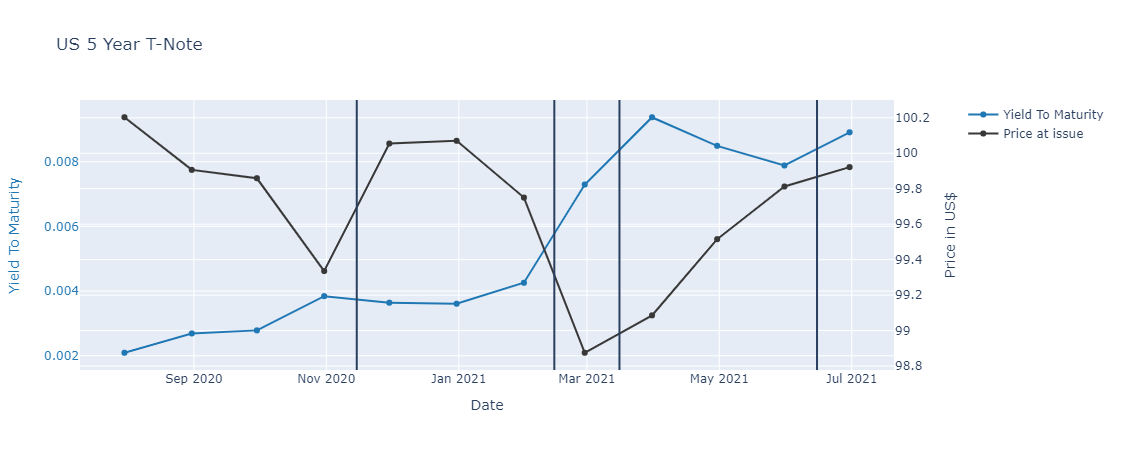

In [19]:
fig = make_subplots(specs=[[{"secondary_y": True}]])  # Create figure with secondary y-axis

# Create vertical lines when Coupon rates change
c_changed_date, shapes = [], []
for i in range(len(ytm_df)-1):
    if ytm_df.iloc[i]["C"] - ytm_df.iloc[i+1]["C"] != 0:
        sdate = datetime.strptime(ytm_df.iloc[i]["ID"], '%Y-%m-%d')
        edate = datetime.strptime(ytm_df.iloc[i+1]["ID"], '%Y-%m-%d')
        delta = edate - sdate
        inter_dates = [sdate + timedelta(days=i) for i in range(delta.days + 1)]
        c_changed_date.append(inter_dates[int(statistics.median(
            range(1, len(inter_dates))))].strftime('%Y-%m-%d'))
for i in c_changed_date:
    shapes.append({'type': 'line', 'xref': 'x', 'yref': 'paper',
                   'x0': i, 'y0': 0, 'x1': i, 'y1': 1})
fig.update_layout(shapes=shapes,)

# Add traces
fig.add_trace(go.Scatter(x=ytm_df["ID"], y=ytm_df["YTM"],
                         name="Yield To Maturity", line_color="#1f77b4"),
              secondary_y=False,)
fig.add_trace(go.Scatter(x=ytm_df["ID"], y=ytm_df["Price at issue"],
                         name="Price at issue", line_color="#383838"),
              secondary_y=True,)

# Set y-axes titles
fig.update_yaxes(title_text="Yield To Maturity", secondary_y=False)
fig.update_yaxes(title_text="Price in US$", secondary_y=True)

fig.update_layout(title_text="US 5 Year T-Note",
                  yaxis=dict(titlefont=dict(color="#1f77b4"),
                             tickfont=dict(color="#1f77b4")),)
fig.update_xaxes(title_text="Date")  # Set x-axis title

fig.show()

Interestingly here, we can see that YTM and prices don't always move inversly; that's because the Coupon rates are not constant throughout. I thus added vertical lines in-between the dates when Coupon rates change to ease comparisons. Also, we can note that when the price of the Bond goes above its FV (of \$100), the YTM does not go negative; that's because of the added revenue from Coupons. If we were looking at a non Coupon paying (i.e.: a Zero-Coupon) Bond, then its YTM would be negative when its price was higher than its FV. Often - as a matter of fact - we do extrapelate Zero-Coupon Equivalent YTMs, this way all YTMs are comparable to each other. This is called '[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(finance))'.

## Bootstrapping and Spot-Rates/Discount-Factors: Coupon-Paying Bond's Zero-Coupon Equivalent Yield To Maturity

Now, we are going to extrapolate the YTM of any coupon-paying Bond as though it did not pay coupons. To do so, we will need to compute [Spot-Rates](https://www.investopedia.com/terms/s/spot_rate.asp) for each period of interest ($f_{\text{acf}}$), then the Spot-Rate for the period of interest is our Zero-Coupon Equivalent Yield To Maturity ($YTM_{ZCE}$).

Computing $YTM_{ZCE}$ is only useful for Coupon-paying Bonds, so we're only looking at a Coupon-paying Bond. Then the Net Present Value of the Bond of interest at the time of issue is
$$
NPV_{{Bond}_t, f_{\text{acf}}} = 
    \begin{Bmatrix}
         \frac{FV_{Bond}}{\left(1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f_{\text{acf}}}} + \sum^{^\frac{m_{Bond}}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C_{{Bond}_t}}{ (1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{if } m_{Bond} \geq f_{\text{acf}} \\
         \\
         \frac{FV_{Bond} + m_{Bond} \text{ } C_{{Bond}_t}}{\left(1 + \text{ } m_{Bond} \text{ } {SR}_{{Bond}_t, T}\right)} & \text{if } m_{Bond} < f_{\text{acf}}
     \end{Bmatrix}
$$
where
* $T$ is the last time period of interest (it could be $m_{Bond}$ if each time period is a year long) (thus it's always the case that $T = \frac{m_{Bond}}{f_{\text{acf}}}$),
* $f_{\text{acf}}$ is the Annual Compounding Frequency in our accounting method used to calculate $NPV_{{Bond}_t, f_{\text{acf}}}$,
* $Bond$ is the Bond we're interested in, *e.g.*: $FYTN$ (Five Year Treasury-Note),
* $FV_{Bond}$ is the Face Value of the $Bond$ (usually \\$1000 or \\$100 when dealing with US sovereign Bonds),
* $m_{Bond}$ is the Maturity of the $Bond$ at time of issue, a.k.a. the Term of the Bond,
* ${Bond}_t$ is the Bond we're interested in specifically issued at time $t$, *e.g.*: $FYTN_{\text{"2020-01-31"}}$ (Five Year Treasury-Note issued on the 31st of January 2020),
* $ C_{{Bond}_t} = \mathcal{C}_{p,{Bond}_t} \text{ } * \text{ } FV_{Bond}$ where $\mathcal{C}_{p,{Bond}_t}$ is the Coupon rate of ${Bond}_t$ (usually expressed as a persentage (thus the '$p$' of $FV_{Bond}$),
* and ${SR}_{{Bond}_t, \mathtt{t}}$ is the Spot Rate for ${Bond}_t$ at time $\mathtt{t}$. Note that ${SR}_{{Bond}_t, \tau}$ above is in a summation itterating through $\tau$s, meaning that we are using a different ${SR}_{{Bond}_t, \tau}$ for each $\tau$ itteration.

then (with he example of US sovereign Bonds) we don't have to look into Bonds with matutities of 1 year or less (since they don't pay Coupons). Thus ${SR}_{{Bond}_t, \tau}$ for US sovereign Bonds for the 1st year is already known and can be found on [Datastream](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&prev=99_US+Treasury+Note+2021+31%2F01%2F26&nav_category=13). From these 1st few discoverable Spot Rates, (i) one can figure out the next Spot Rate (the 1st theoretical Spot Rate); (ii) then the 2nd theoretical Spot Rate can be calculated using the discoverable Spot Rates and the 1st theoretical Spot Rate, (iii) then the 3rd theoretical Spot Rate can be calculated using the discoverable Spot Rates and the first two theoretical Spot Rates, and so on till time period '$T$'. Doing so means that we have all ${SR}_{{Bond}_t, \mathtt{t}}$ where $\mathtt{t} > \mathtt{T}$ and $\mathtt{T}$ is the end of the time window investigated at any stage (i), (ii), ... Thus, at any one of these stages we can let $T = \mathtt{T}$; and remembering that $T = \frac{m_{Bond}}{f_{\text{acf}}}$, then:

$$ \begin{array}{ll}
NPV_{{Bond}_t, f_{\text{acf}}}
         &= \frac{FV_{Bond}}{\left(1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f_{\text{acf}}}} + \sum^{^\frac{m_{Bond}}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C_{{Bond}_t}}{ (1 + f_{\text{acf}} \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{where } m_{Bond} \geq f_{\text{acf}} \\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f}} + \sum^{^{\frac{m_{Bond}}{f}}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{letting } f = f_{\text{acf}} = f_{ac \mathbf{p} f} = \text{fixed 'annual Coupon payment frequency'}\\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, T}\right)^\frac{m_{Bond}}{f}} + \frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, T})^{T} } + \sum^{^{\frac{m_{Bond}}{f}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{extracting the last summand} \\
         &= \frac{FV_{Bond}}{\left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^\mathtt{T}} + \frac{f \text{ } C_{{Bond}_t}}{ \left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^{\mathtt{T}} } + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} & \text{since we let } T = \mathtt{T} \text{ and it is true that } T = \frac{m_{Bond}}{f_{\text{acf}}}\\
         &= \frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{\left(1 + f \text{ } {SR}_{{Bond}_t, \mathtt{T}}\right)^\mathtt{T}} + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} \\
\end{array} $$

Let's add 'hats' to the unknown variables; here the only unknown variable is the last ${SR}_{{Bond}_t, \mathtt{t}}$ which is ${SR}_{{Bond}_t, \mathtt{T}}$, so it'll be written as $\widehat{{SR}_{{Bond}_t, \mathtt{T}}}$. Remember that this is because we have all ${SR}_{{Bond}_t, \mathtt{t}}$ where $\mathtt{t} > \mathtt{T}$ and $\mathtt{T}$ is the end of the time window investigated at any stage (i), (ii), ... defined above. Then:

$$ \begin{array}{ll}
NPV_{{Bond}_t, f}
         &= \frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{\left(1 + f \text{ } \widehat{{SR}_{{Bond}_t, \mathtt{T}}}\right)^\mathtt{T}} + \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }} \\
\end{array} $$
then:
$$ \begin{array}{ll}
\widehat{{SR}_{{Bond}_t, \mathtt{T}}}
         &= \frac{
             \sqrt[\mathtt{T}]{\frac{FV_{Bond} + f \text{ } C_{{Bond}_t}}{{NPV}_{{Bond}_t, f} - \sum^{^{\mathtt{T}-1}}_{\tau=1} {\frac{f \text{ } C_{{Bond}_t}}{ (1 + f \text{ } {SR}_{{Bond}_t, \tau})^{\tau} }}}} - 1
             }{f}
\end{array} $$


Let's make a Python function to return this Spot Rate for any such stage:

In [20]:
def Spot_Rate_Last(fv, m, c, p, sr, f=0.5):
    """Spot_Rate_Last(f,fv,m,c,p,sr)
    This Python function returns the Zero-Coupon Equivalent rate of a coupon-paying Bond (otherwise known as the Spot-Rate) of one time period (defined as ' f ') after the last one in the list of provided (past) spot-rates (' sp ').

    Returns
    -------

    float: The last spot rate of a Bond for the period looked at.
    """
    discouted_coupon_payments = sum([(f*c)/((1 + (f*j))**(i+1))  # ' +1 ' because 'enumerate' starts at 0
                                     for i, j in enumerate(sr)])
    last_sr = ((((fv + f*c)/(p - discouted_coupon_payments))**(f/m))-1)/f
    return last_sr

### Example with US Treasury Bonds with Fixed Coupon Rates and using Semi-Annual Compounding

#### On-the-run sovereign Bonds

Now we can repeat the above for different US T-Notes with simillar issue dates and different maturing dates. We collect all data-points in a Python dictionary ```container_container``` before tidying it in the ```yc_df``` pandas data-frame below. Remeber though, we've put ourselves in the shooes of an economic agent looking to invest in 'brand new' sovereign Bonds, in Bonds that our agent would buy on issue; such bonds are called [on-the-run sovereign Bonds](https://www.investopedia.com/terms/o/on-the-runtreasuries.asp).

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,CD,CF,YTM
RDL,,,,,,,,,,,,
2020-12-29,613V2R,UTD.STS OF AMERICA 2020 ZERO 29/12/20,2020-07-28,0.5,100,0,ZERO,2020-12-29,99.9469,[2021-02-01 00:00:00],[0.0],0.001063
2022-07-31,613XGW,US TREASURY NOTE 2020 1/8% 31/07/22 BD-2022,2020-07-31,2,100,0.125,FIX,2022-07-31,100.0313,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.125, 0.125, 0.125, 0.125]",0.001093
2025-07-31,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002091
2027-07-31,613XG1,US TREASURY NOTE 2020 3/8% 31/07/27 N-2027,2020-07-31,7,100,0.375,FIX,2027-07-31,99.9140,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3...",0.003875


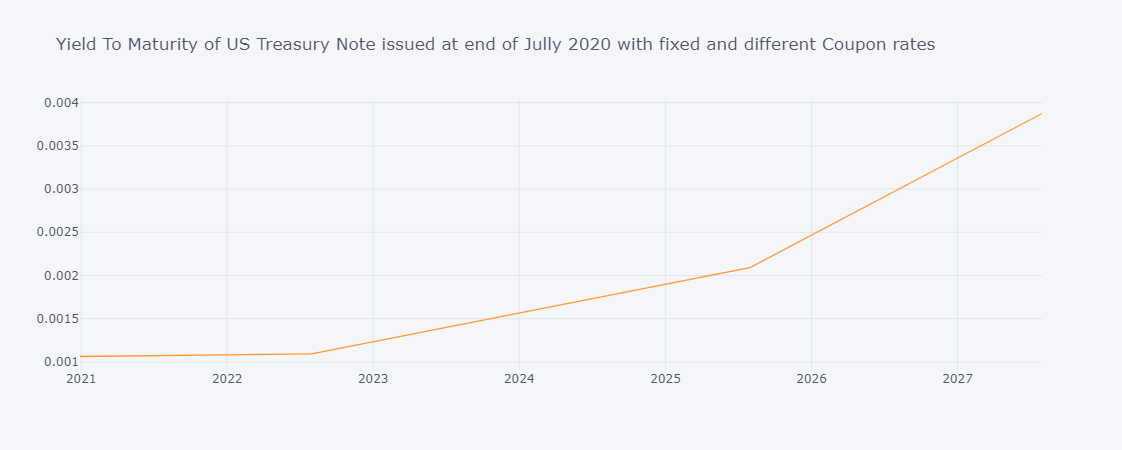

In [21]:
yc_df = DSWS_fixed_and_price_data_collection_and_ytm(
    instruments=["613V2R", "613XGW", "613XGU", "613XG1"],
    fields=["DSCD", "NAME", "ID", "TERM",
            "RV", "C", "CTYP", "RDL"])

yc_df.index = yc_df['RDL']

display(yc_df)
yc_df["YTM"].iplot(title="Yield To Maturity of US Treasury Note issued at end of Jully 2020 with fixed and different Coupon rates")

We can see that we have very little liquidity in such on-the-run sovereign Bonds. I couldn't find ones that our agent could buy at time of issue (towards the end of July 2020). Such a lack of liquidity does not provide us with enough datapoints to compute Spot Rates.

> ##### Example of how a lack in liquidity in on-the-run sovereign Bonds disables us from computing Spot Rates without using off-the-run sovereign Bonds' data
> We know from the ```yc_df``` data-frame above that we do not have data for on-the-run US Treasury Bonds issued towards the end of July 2020 with 1 year maturity. That's because such a specific Bond is not being sold on the market. Say that we try to compute the Spot Rate for such a specific Bond, we'd have to use the following data:
> 
> |Maturity (Years)|Coupon Rate|Price at issue|Yield To Maturity|
> |:-|:-|:-|:-|
> |0.50|0.000|99.9469|0.001063|
> |1.00| $\mathcal{C}_{p,\text{OYTB}_{"2020-07-31"}}$ |$P_{\text{OYTB}_{"2020-07-31"}}$|$YTM_{\text{OYTB}_{"2020-07-31"}}$|
>
> Where $P_{\text{OYTB}_{"2020-07-31"}}$ is the price of our fictisious One Year Treasury Bill issued on 2020-07-31. Then our cashflow is:
>
> |Time (years) from issue to cashflow date|Calculation of discouted cashflow|Discouted cashflow|
> |:-|:-|:-|
> |0.5|$\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}}$ x ${FV}_{\text{OYTB}}$ x $f_{\text{acpf}}$ = 0.000 x \$100 x 0.5|\$0.00|
> |1.0|$\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}}$ x ${FV}_{\text{OYTB}}$ x $f_{\text{acpf}} = 0.000$ x \\$100 x 0.5 + \$100|\$100|
> 
> since the Coupon rate of all US Bonds with maturities equal to or lower than 1 year are Zero-Coupon. Then
> 
> $$ \begin{array}{ll} {NPV}_{\text{OYTB}_{"2020-07-31"}, 0.5} &= \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}}}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}} + {FV}_{\text{OYTB}_{"2020-07-31"}}}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \\ P_{\text{OYTB}_{"2020-07-31"}} &= \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}}}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{\mathcal{C}_{p, \text{OYTB}_{"2020-07-31"}} \text{ x } {FV}_{\text{OYTB}} \text{ x } f_{\text{acpf}} + {FV}_{\text{OYTB}_{"2020-07-31"}}}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{ letting } {NPV}_{\text{OYTB}_{"2020-07-31"}, 0.5} = P_{\text{OYTB}_{"2020-07-31"}} \\ &= \frac{0.000 \text{ x } \$100 \text{ x } 0.5}{1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 1}} + \frac{0.000 \text{ x } \$100 \text{ x } 0.5 + \$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \\ &= \frac{0.000 \text{ x } \$100 \text{ x } 0.5}{1 + {YTM}_{\text{SMTB}_{"2020-07-31"}}} + \frac{0.000 \text{ x } \$100 \text{ x } 0.5 + \$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{ letting } {SR}_{\text{OYTB}_{"2020-07-31"}, 1} = {YTM}_{\text{SMTB}_{"2020-07-31"}} = \text{ YTM of the Six Month Treasury Bill at time of its issue} \\ &= \frac{\$ 100}{(1 + {SR}_{\text{OYTB}_{"2020-07-31"}, 2})^2} \text{, thus} \\ {SR}_{\text{OYTB}_{"2020-07-31"}, 2} &= \sqrt[2]{\frac{\$ 100}{P_{\text{OYTB}_{"2020-07-31"}}}}-1 \end{array}$$
> 
> And thus, without a OYTB Bond from which to get $P_{\text{OYTB}_{"2020-07-31"}}$, we cannot calculate ${SR}_{\text{OYTB}_{"2020-07-31"}, 2}$.

This lack of on-the-run liquidity can be solved by using off-the-run Bonds:

#### On and Off-the-run sovereign Bonds

[Off-the-run sovereign Bonds](https://www.investopedia.com/terms/o/off-the-runtreasuries.asp) are simply Bonds issued before the latest. In our hypothetical situation, we were only looking at Bonds issued at (approximatelly) the same time, at the end of July 2020. What we can do however, is look at Bonds issued earlier. *E.g.*: We can use a Bond with 1 year to maturity issued 6 months earlier (at the end of January 2020).

In [22]:
from_date = "2020-07-31"

We stick to 360 days a year to keep in line with the [FEDERAL RESERVE statistical release](https://www.federalreserve.gov/releases/h15/current/h15.pdf), however, we should both (i) let people chose the average number of days per year they deem useful in this calculation and (ii) the rounding they're ready to use

In [23]:
off_run_df = DSWS_fixed_and_price_data_collection_and_ytm(
    instruments=["247DK9", "235FFA", "218QH0", "823D0N", "210EV1",
                 "235FFD", "247DLH", "218QJQ", "235FF9", "247DLR"],
    fields=["DSCD", "NAME", "ID", "TERM",
            "RV", "C", "CTYP", "RDL"])

# Configure the data-frame's index appropriately
off_run_df.index = off_run_df['RDL']
off_run_df.index.names = ['RD']  # ' RD ' for Redemption Date

# Combine off- and on-the-run Bonds' data-frames
off_on_df = yc_df.append(off_run_df)

# Collect and add price data as of date of interest
off_on_df["Price on 2020-07-31"] = [
    ds.get_data(start="2020-07-31", end="2020-07-31",
                fields="X", freq='D',
                tickers=i).values[0][2]
    for i in list(off_on_df["DSCD"])]

# Add the YTM implied by 2020-07-31 Price
off_on_df["YTM implied by 2020-07-31 Price"] = [
    YTM_Solver(
        fv=off_on_df.iloc[i]["RV"],
        c=off_on_df.iloc[i]["RV"] * off_on_df.iloc[i]["C"] / 100,
        m=(round(2*((datetime.strptime(off_on_df.iloc[i]["RDL"], '%Y-%m-%d') -
                     datetime.strptime(from_date, '%Y-%m-%d')).days)/360)) / 2,
        f_acf=0.5, error=False,
        p=off_on_df.iloc[i]["Price on 2020-07-31"])
    for i in range(len(off_on_df))]

# Add the Years Left to Maturity
off_on_df["Years Left to Maturity"] = [
    (round(2*((datetime.strptime(off_on_df.iloc[i]["RDL"], '%Y-%m-%d') -
               datetime.strptime(from_date, '%Y-%m-%d')).days)/360)) / 2
    for i in range(len(off_on_df))]

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,CD,CF,YTM,Price on 2020-07-31,YTM implied by 2020-07-31 Price,Years Left to Maturity
2020-12-29,613V2R,UTD.STS OF AMERICA 2020 ZERO 29/12/20,2020-07-28,0.5,100,0,ZERO,2020-12-29,99.9469,[2021-02-01 00:00:00],[0.0],0.001063,99.9559,0.000882,0.5
2021-07-31,235FFA,US TREASURY NOTE 2019 1 3/4% 31/07/21 BD-2021,2019-07-31,2,100,1.75,FIX,2021-07-31,99.7930,"[2020-01-31 00:00:00, 2020-07-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75]",0.018559,101.6094,0.001389,1.0
2021-12-31,247DK9,US TREASURY NOTE 2019 1 5/8% 31/12/21 BL-2021,2019-12-31,2,100,1.625,FIX,2021-12-31,100.0742,"[2020-06-30 00:00:00, 2020-12-31 00:00:00, 202...","[1.625, 1.625, 1.625, 1.625]",0.015872,102.1016,0.002208,1.5
2022-07-31,613XGW,US TREASURY NOTE 2020 1/8% 31/07/22 BD-2022,2020-07-31,2,100,0.125,FIX,2022-07-31,100.0313,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.125, 0.125, 0.125, 0.125]",0.001093,100.0313,0.001093,2.0
2022-12-31,823D0N,US TREASURY NOTE 2015 2 1/8% 31/12/22 T-2022,2015-12-31,7,100,2.125,FIX,2022-12-31,100.2031,"[2016-06-30 00:00:00, 2017-01-03 00:00:00, 201...","[2.125, 2.125, 2.125, 2.125, 2.125, 2.125, 2.1...",0.020937,104.8281,0.001883,2.5
2023-07-31,210EV1,US TREASURY NOTE 2018 2 3/4% 31/07/23 AB-2023,2018-07-31,5,100,2.75,FIX,2023-07-31,99.5469,"[2019-01-31 00:00:00, 2019-07-31 00:00:00, 202...","[2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.7...",0.028479,107.8438,0.001295,3.0
2023-12-31,218QH0,US TREASURY NOTE 2018 2 5/8% 31/12/23 AG-2023,2018-12-31,5,100,2.625,FIX,2023-12-31,100.5391,"[2019-07-01 00:00:00, 2019-12-31 00:00:00, 202...","[2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.6...",0.025096,108.4609,0.001980,3.5
2024-07-31,235FFD,US TREASURY NOTE 2019 1 3/4% 31/07/24 AB-2024,2019-07-31,5,100,1.75,FIX,2024-07-31,99.6563,"[2020-01-31 00:00:00, 2020-07-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",0.018222,106.3203,0.001641,4.0
2024-12-31,247DLH,US TREASURY NOTE 2019 1 3/4% 31/12/24 AH-2024,2019-12-31,5,100,1.75,FIX,2024-12-31,100.2734,"[2020-06-30 00:00:00, 2020-12-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",0.016927,106.8828,0.002124,4.5
2025-07-31,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002091,100.2031,0.002091,5.0


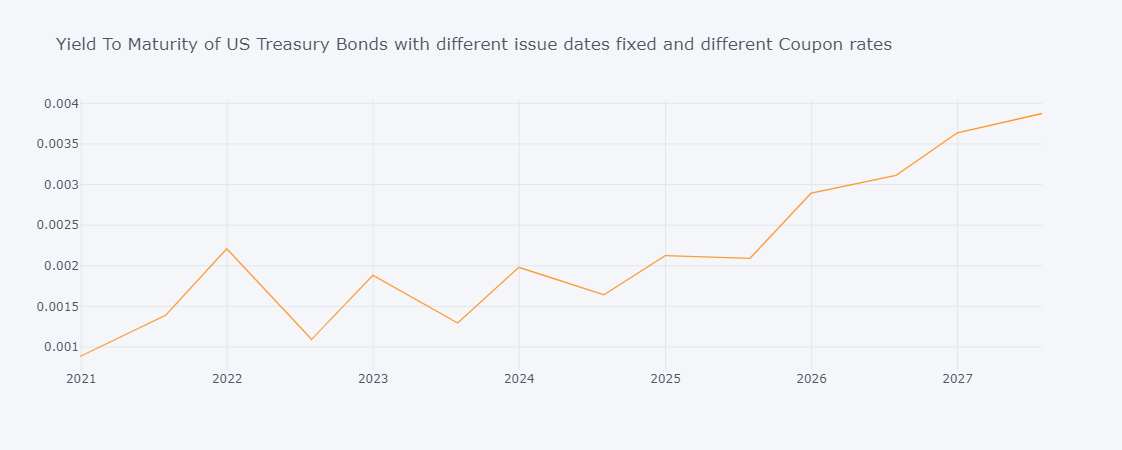

In [24]:
off_on_df.sort_values('RDL', inplace=True)
display(off_on_df)
off_on_df["YTM implied by 2020-07-31 Price"].iplot(
    title="Yield To Maturity of US Treasury Bonds with different issue dates fixed and different Coupon rates")

This vertical zig-zaging is an unexpected pattern. The reason for which it is unexpected is that an economic agent ought to be able to exploit [arbitrage](https://www.investopedia.com/terms/a/arbitrage.asp) opportunities brought up by such price discrapencies with other securities (*e.g.*: [Swaps](https://www.investopedia.com/articles/optioninvestor/07/swaps.asp)). Let's thus verify if the YTM proposed by our graph above are correct:

In [25]:
for i in range(len(off_on_df)):
    _fv=off_on_df.iloc[i]["RV"]
    _c=off_on_df.iloc[i]["RV"] * off_on_df.iloc[i]["C"] / 100
    _f_acf=0.5
    _p=off_on_df.iloc[i]["Price on 2020-07-31"]
    _m=off_on_df.iloc[i]["Years Left to Maturity"]
    _ytm, err = YTM_Solver(fv=_fv, c=_c, m=_m, f_acf=_f_acf, error=True, p=_p)
    zero = (_fv/((1+(_f_acf*_ytm))**(_m/_f_acf))) - _p + sum([
        (_f_acf * _c)/((1+(_f_acf*_ytm))**i) for i in range(1, int(_m/_f_acf)+1)])
    print(f"Years left to Maturity: {_m}, YTM from function: {_ytm}, err from function: {err}, check: {zero}.")

Years left to Maturity: 0.5, YTM from function: 0.0008823891336079769, err from function: 0.0, check: 0.0.
Years left to Maturity: 1.0, YTM from function: 0.001389229366311189, err from function: -1.3322676295501878e-14, check: -1.3322676295501878e-14.
Years left to Maturity: 1.5, YTM from function: 0.0022083810604940305, err from function: 9.325873406851315e-15, check: 9.325873406851315e-15.
Years left to Maturity: 2.0, YTM from function: 0.0010932860674747608, err from function: -4.0084602304091277e-13, check: -4.0084602304091277e-13.
Years left to Maturity: 2.5, YTM from function: 0.0018830173997592785, err from function: 2.7533531010703882e-14, check: 2.7533531010703882e-14.
Years left to Maturity: 3.0, YTM from function: 0.0012947271629833368, err from function: -7.478462293875054e-13, check: -7.478462293875054e-13.
Years left to Maturity: 3.5, YTM from function: 0.001980168093318993, err from function: -4.065157099830685e-10, check: -4.065157099830685e-10.
Years left to Maturity:

The only Zero Coupon Bond in our ```off_on_df``` data-frame is the 1st one (the ```0th``` one in 'Python language'); we can use it as a 1st value from which to compute/Bootstrap all other Zero-Coupon-Equivalent Bond Spot-Rates:

In [26]:
off_on_df.iloc[0]["YTM implied by 2020-07-31 Price"]

0.0008823891336079769

In [27]:
spot_rates = [0.0008823891336079769]  # This number is from the YTM of the only ZCB we've got as per the above.
for i in range(len(spot_rates), len(off_on_df)):
    spot_rates.append(Spot_Rate_Last(
        fv=off_on_df.iloc[i]["RV"], sr=spot_rates, f=0.5,
        m=off_on_df.iloc[i]["Years Left to Maturity"],
        c=off_on_df.iloc[i]["RV"] * off_on_df.iloc[i]["C"] / 100,
        p=off_on_df.iloc[i]["Price on 2020-07-31"]))
off_on_df["Spot Rates as of 2020-07-31"] = spot_rates

In [28]:
off_on_df["YTM"][0]

0.0010625642216017055

In [29]:
off_on_df

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price at issue,CD,CF,YTM,Price on 2020-07-31,YTM implied by 2020-07-31 Price,Years Left to Maturity,Spot Rates as of 2020-07-31
2020-12-29,613V2R,UTD.STS OF AMERICA 2020 ZERO 29/12/20,2020-07-28,0.5,100,0,ZERO,2020-12-29,99.9469,[2021-02-01 00:00:00],[0.0],0.001063,99.9559,0.000882,0.5,0.000882
2021-07-31,235FFA,US TREASURY NOTE 2019 1 3/4% 31/07/21 BD-2021,2019-07-31,2,100,1.75,FIX,2021-07-31,99.7930,"[2020-01-31 00:00:00, 2020-07-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75]",0.018559,101.6094,0.001389,1.0,0.001391
2021-12-31,247DK9,US TREASURY NOTE 2019 1 5/8% 31/12/21 BL-2021,2019-12-31,2,100,1.625,FIX,2021-12-31,100.0742,"[2020-06-30 00:00:00, 2020-12-31 00:00:00, 202...","[1.625, 1.625, 1.625, 1.625]",0.015872,102.1016,0.002208,1.5,0.002216
2022-07-31,613XGW,US TREASURY NOTE 2020 1/8% 31/07/22 BD-2022,2020-07-31,2,100,0.125,FIX,2022-07-31,100.0313,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.125, 0.125, 0.125, 0.125]",0.001093,100.0313,0.001093,2.0,0.001093
2022-12-31,823D0N,US TREASURY NOTE 2015 2 1/8% 31/12/22 T-2022,2015-12-31,7,100,2.125,FIX,2022-12-31,100.2031,"[2016-06-30 00:00:00, 2017-01-03 00:00:00, 201...","[2.125, 2.125, 2.125, 2.125, 2.125, 2.125, 2.1...",0.020937,104.8281,0.001883,2.5,0.001892
2023-07-31,210EV1,US TREASURY NOTE 2018 2 3/4% 31/07/23 AB-2023,2018-07-31,5,100,2.75,FIX,2023-07-31,99.5469,"[2019-01-31 00:00:00, 2019-07-31 00:00:00, 202...","[2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.7...",0.028479,107.8438,0.001295,3.0,0.001284
2023-12-31,218QH0,US TREASURY NOTE 2018 2 5/8% 31/12/23 AG-2023,2018-12-31,5,100,2.625,FIX,2023-12-31,100.5391,"[2019-07-01 00:00:00, 2019-12-31 00:00:00, 202...","[2.625, 2.625, 2.625, 2.625, 2.625, 2.625, 2.6...",0.025096,108.4609,0.001980,3.5,0.001998
2024-07-31,235FFD,US TREASURY NOTE 2019 1 3/4% 31/07/24 AB-2024,2019-07-31,5,100,1.75,FIX,2024-07-31,99.6563,"[2020-01-31 00:00:00, 2020-07-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",0.018222,106.3203,0.001641,4.0,0.001641
2024-12-31,247DLH,US TREASURY NOTE 2019 1 3/4% 31/12/24 AH-2024,2019-12-31,5,100,1.75,FIX,2024-12-31,100.2734,"[2020-06-30 00:00:00, 2020-12-31 00:00:00, 202...","[1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7...",0.016927,106.8828,0.002124,4.5,0.002141
2025-07-31,613XGU,US TREASURY NOTE 2020 1/4% 31/07/25 AB-2025,2020-07-31,5,100,0.25,FIX,2025-07-31,100.2031,"[2021-02-01 00:00:00, 2021-08-02 00:00:00, 202...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...",0.002091,100.2031,0.002091,5.0,0.002093


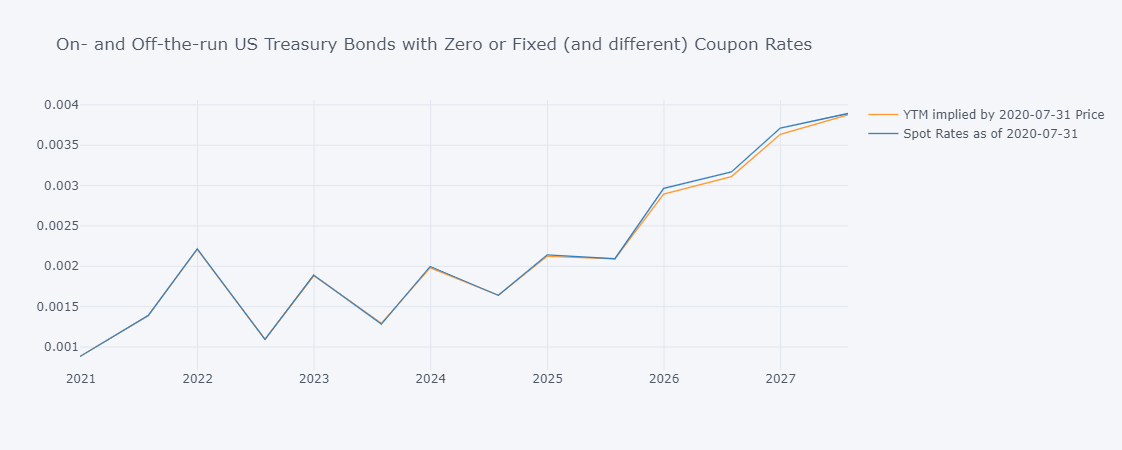

In [30]:
off_on_df[["YTM implied by 2020-07-31 Price", "Spot Rates as of 2020-07-31"]].iplot(
    title="On- and Off-the-run US Treasury Bonds with Zero or Fixed (and different) Coupon Rates")

Let's make a function for it:

In [31]:
def Get_dsws_spot_rates_from_df(bond_df, point_in_time, coupon_paying_freq=0.5, number_of_existing_sr=None):
    """Get_dsws_spot_rates_from_df(bond_df, point_in_time, coupon_paying_freq=0.5) Version 1.0
    This Python function takes information from the bond_df pandas data-frame to compute Spot Rates.
    The Dirty Price provided incorporates accrued interests of the next Coupon in the cash-flow. The Dirty Yield reflects that Dirty Price.

    Dependencies
    ----------

    Python library 'pandas' version 1.2.4.
    Python library 'DatastreamDSWS' authenticated in the object ' ds '.

    Parameters
    ----------

    bond_df: Pandas data-frame
        Pandas data-frame with a column named 'RDL' (Redemption Date - Last), 'DSCD' (Datastream Codes/Mnemonic), 'RV' (Redemption Value), 'C' (Coupon Rate), 'CTYP' (Coupon Type).

    point_in_time: sting
        Date from which calculations will be done; e.g.: YTM will be computed from prices on that date.

    coupon_paying_freq: float or integer
        The frequency of coupon payments per year; e.g.: Semi-annual/6-month coupon payments reflect in coupon_paying_freq=0.5.
        Default: coupon_paying_freq=0.5

    number_of_existing_sr: None or int
        The number of spot rates already known.
        E.g.: if the 1st three rows of ' bond_df ' are for Zero-Coupon-Bonds, then number_of_existing_sr should be se to 3.
        If set to None, it will be equated to the number of rows with "CTYP" values set to "ZERO".
        Default: number_of_existing_sr=None

    Returns
    -------

    Pandas data-frame.
    """

    # Get the number of Spot Rates already known if not provided
    if number_of_existing_sr is None:
        number_of_existing_sr = bond_df["CTYP"].str.count('ZERO').sum()
    # Arange the order of our data-frame's rows
    bond_df.sort_values('RDL', inplace=True)
    # Get price data from dsws
    bond_df[f"Price on {point_in_time}"] = [
        ds.get_data(start=point_in_time, end=point_in_time,
                    fields="X", freq='D',
                    tickers=i).values[0][2]
        for i in list(bond_df["DSCD"])]

    # Get YTM implied by the ' point_in_time ' date
    bond_df[f"YTM implied by {point_in_time} Price"] = [
        YTM_Solver(
            fv=bond_df.iloc[i]["RV"],
            c=bond_df.iloc[i]["RV"] * bond_df.iloc[i]["C"] / 100,
            m=(round(2*((
                datetime.strptime(bond_df.iloc[i]["RDL"], '%Y-%m-%d') -
                datetime.strptime(point_in_time, '%Y-%m-%d')).days)/360)) / 2,
            f_acf=0.5, error=False,
            p=bond_df.iloc[i][f"Price on {point_in_time}"])
        for i in range(len(bond_df))]

    # Get Dirty Price as of ' point_in_time '
    bond_df[f"Dirty Price on {point_in_time}"] = [
        bond_df.iloc[i][f"Price on {point_in_time}"] +
        ((bond_df.iloc[i]["RV"] * bond_df.iloc[i]["C"] / 100)*(1 - (
            (((datetime.strptime(bond_df.iloc[i]["RDL"], '%Y-%m-%d') -
               datetime.strptime(point_in_time, '%Y-%m-%d')).days)/360) % 1)))
        for i in range(len(bond_df))]

    # Get the number of Years left from ' point_in_time ' to maturity
    bond_df[f"Years from {point_in_time} to Maturity"] = [
        (round(2*((datetime.strptime(bond_df.iloc[i]["RDL"], '%Y-%m-%d') -
                   datetime.strptime(point_in_time,
                                     '%Y-%m-%d')).days)/360)) / 2
        for i in range(len(bond_df))]

    # Get the exact/Dirty number of Years left from ' point_in_time ' to maturity
    bond_df[f"Dirty Years from {point_in_time} to Maturity"] = [
        ((datetime.strptime(bond_df.iloc[i]["RDL"], '%Y-%m-%d') -
          datetime.strptime(point_in_time, '%Y-%m-%d')).days)/360
        for i in range(len(bond_df))]

    # Get spot rates and add them to our ' bond_df '
    spot_rates = [bond_df[
        f"YTM implied by {point_in_time} Price"].iloc[i]
                  for i in range(bond_df["CTYP"].str.count('ZERO').sum())]
    for i in range(len(spot_rates), len(bond_df)):
        _sr = Spot_Rate_Last(
            fv=bond_df.iloc[i]["RV"],
            m=bond_df.iloc[i][f"Years from {point_in_time} to Maturity"],
            c=bond_df.iloc[i]["RV"] * bond_df.iloc[i]["C"] / 100,
            p=bond_df.iloc[i][f"Price on {point_in_time}"],
            sr=spot_rates, f=coupon_paying_freq)
        spot_rates.append(_sr)
    bond_df[f"Spot Rates as of {point_in_time}"] = spot_rates
    bond_df.index = bond_df["RDL"]
    bond_df.index.names = ['RD']

    return bond_df

In [32]:
def Get_dsws_spot_rates(point_in_time, coupon_paying_freq=0.5, number_of_existing_sr=None,
                        fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"],
                        instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ",  # These are on-the-run
                                     "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN", "233HJK", "247DLR", "610JR7"]):  # These are off-the-run
    """Get_dsws_spot_rates(point_in_time, coupon_paying_freq=0.5, fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"], instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ", "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN", "233HJK", "247DLR", "610JR7"]) Version 1.0
    This Python function takes information from datastream to compute Spot Rates.

    Dependencies
    ----------

    Python library 'pandas' version 1.2.4.
    Python library 'DatastreamDSWS' authenticated in the object ' ds '.
    The defined function ' Get_dsws_spot_rates_from_df '

    Parameters
    ----------

    point_in_time: sting
        Date from which calculations will be done; e.g.: YTM will be computed from prices on that date.

    coupon_paying_freq: float or integer
        The frequency of coupon payments per year; e.g.: Semi-annual/6-month coupon payments reflect in coupon_paying_freq=0.5.
        Default: coupon_paying_freq=0.5

    fields: list
        Python list of strings of fields as per Datastream.
        Default: fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]

    instruments: list
        Python list of strings of instruments' Datastream Codes/Mnemonic.
        Default: instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ", "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN", "233HJK", "247DLR", "610JR7"]

    Returns
    -------

    Pandas data-frame.
    """

    global Get_dsws_spot_rates_from_df

    _df = pandas.DataFrame()
    for i in instruments:
        __df = ds.get_data(tickers=i, kind=0, fields=fields)
        _df = _df.append(pandas.DataFrame(
            data=list(__df['Value'].values), index=fields).T)

    return Get_dsws_spot_rates_from_df(bond_df=_df,
                                       coupon_paying_freq=coupon_paying_freq,
                                       number_of_existing_sr=number_of_existing_sr,
                                       point_in_time=point_in_time)

In [33]:
instruments = ["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ", "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN", "233HJK", "247DLR", "610JR7"]
fields = ["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]
_df = pandas.DataFrame()
for i in instruments:
    __df = ds.get_data(tickers=i, kind=0, fields=fields)
    _df = _df.append(pandas.DataFrame(
        data=list(__df['Value'].values), index=fields).T)
_df

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL
0,628GA1,UTD.STS OF AMERICA 2020 ZERO 01/07/21,2020-12-31,0.5,100,0,ZERO,2021-07-01
0,628GAL,UTD.STS OF AMERICA 2020 ZERO 30/12/21,2020-12-31,1,100,0,ZERO,2021-12-30
0,628GD0,US TREASURY NOTE 2020 1/8% 31/12/22 BL-2022,2020-12-31,2,100,0.125,FIX,2022-12-31
0,628GF5,US TREASURY NOTE 2020 3/8% 31/12/25 AH-2025,2020-12-31,5,100,0.375,FIX,2025-12-31
0,628GDZ,US TREASURY NOTE 2020 5/8% 31/12/27 T-2027,2020-12-31,7,100,0.625,FIX,2027-12-31
0,610JPM,US TREASURY NOTE 2020 1/8% 30/06/22 BC-2022,2020-06-30,2,100,0.125,FIX,2022-06-30
0,208PR9,US TREASURY NOTE 2018 2 5/8% 30/06/23 AA-2023,2018-06-30,5,100,2.625,FIX,2023-06-30
0,218QH0,US TREASURY NOTE 2018 2 5/8% 31/12/23 AG-2023,2018-12-31,5,100,2.625,FIX,2023-12-31
0,233HJH,US TREASURY NOTE 2019 1 3/4% 30/06/24 AA-2024,2019-06-30,5,100,1.75,FIX,2024-06-30
0,247DLH,US TREASURY NOTE 2019 1 3/4% 31/12/24 AH-2024,2019-12-31,5,100,1.75,FIX,2024-12-31


In [34]:
on_off_df_as_of_2020_12_31 = Get_dsws_spot_rates(
    point_in_time="2020-12-31", coupon_paying_freq=0.5,
    instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ",  # These are on-the-run
                 "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN",
                 "233HJK", "247DLR", "610JR7"])
on_off_df_as_of_2020_12_31

,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,Price on 2020-12-31,YTM implied by 2020-12-31 Price,Dirty Price on 2020-12-31,Years from 2020-12-31 to Maturity,Dirty Years from 2020-12-31 to Maturity,Spot Rates as of 2020-12-31
RD,,,,,,,,,,,,,,
2021-07-01,628GA1,UTD.STS OF AMERICA 2020 ZERO 01/07/21,2020-12-31,0.5,100,0,ZERO,2021-07-01,99.9555,0.000890,99.955500,0.5,0.505556,0.000890
2021-12-30,628GAL,UTD.STS OF AMERICA 2020 ZERO 30/12/21,2020-12-31,1,100,0,ZERO,2021-12-30,99.8900,0.001101,99.890000,1.0,1.011111,0.001101
2022-06-30,610JPM,US TREASURY NOTE 2020 1/8% 30/06/22 BC-2022,2020-06-30,2,100,0.125,FIX,2022-06-30,100.0156,0.001146,100.076017,1.5,1.516667,0.001146
2022-12-31,628GD0,US TREASURY NOTE 2020 1/8% 31/12/22 BL-2022,2020-12-31,2,100,0.125,FIX,2022-12-31,100.0000,0.001250,100.121528,2.0,2.027778,0.001250
2023-06-30,208PR9,US TREASURY NOTE 2018 2 5/8% 30/06/23 AA-2023,2018-06-30,5,100,2.625,FIX,2023-06-30,106.1563,0.001567,107.388592,2.5,2.530556,0.001578
2023-12-31,218QH0,US TREASURY NOTE 2018 2 5/8% 31/12/23 AG-2023,2018-12-31,5,100,2.625,FIX,2023-12-31,107.3203,0.001773,109.835925,3.0,3.041667,0.001789
2024-06-30,233HJH,US TREASURY NOTE 2019 1 3/4% 30/06/24 AA-2024,2019-06-30,5,100,1.75,FIX,2024-06-30,105.3516,0.002144,106.143961,3.5,3.547222,0.002163
2024-12-31,247DLH,US TREASURY NOTE 2019 1 3/4% 31/12/24 AH-2024,2019-12-31,5,100,1.75,FIX,2024-12-31,105.9141,0.002627,107.562017,4.0,4.058333,0.002658
2025-06-30,610JRN,US TREASURY NOTE 2020 1/4% 30/06/25 AA-2025,2020-06-30,5,100,0.25,FIX,2025-06-30,99.7265,0.003113,99.836222,4.5,4.561111,0.003119


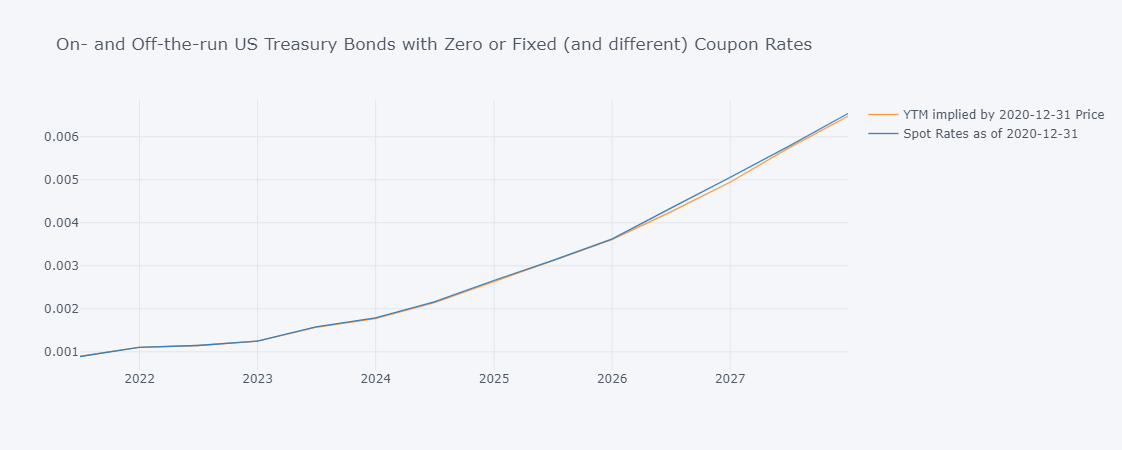

In [35]:
on_off_df_as_of_2020_12_31[
    ["YTM implied by 2020-12-31 Price", "Spot Rates as of 2020-12-31"]].iplot(
    title="On- and Off-the-run US Treasury Bonds with Zero or Fixed (and different) Coupon Rates")

### Accrued Interests

Lasly - when it comes to Yields - if one was to buy a Bond in the secondary market at a time other than just after a Coupon was paid, the Bond's seller would loose out on the upcoming Coupon payment. In other words, if a Bond (with \\$100 Face Value) was to pay a \\$0.1 Coupon a day, and was sold on the 30th of Jan., the Bond's seller would have gathered \\$18.6 in Coupon paymnets that half-year (in the 6 previous months); however, if the Coupon is only paid every 6 months on the 31st of Jan. and 31st of Jul., the Bond's seller would have gathered no Coupon payments that half-year. To compensate for this lost payment, Bond sellers on the secondary market do not tend to sell at the NPV, *i.e.*: they tend not to Bid at a Clean Price. (The clean price is the NPV in the 'lingo'.) Instead, they tend to Bid at a Dirty Price that incorporates this 'Coupon payment loss' in an arythmatic/straight-line method; this 'loss' is called the Accrued, think of it as accrued interest that the seller would have had and insists on via this Dirty Price premium. One can see - thanks to the aformentioned relationship between a Bond's price and Yield - that if the price differs, so does its YTM. This - evidentaly - does not apply to Zero-Coupon-Bonds (ZCB); or rather: ZCB's Clean and Dirty Prices are the same. Let's add Clean and Dirty clasifications:

Let's say that our investor considers only the bonds in our ```on_off_df_as_of_2020_12_31``` data-frame, but on 2021-03-31:

**1st**: We'll need to find out when the last coupon was paid:

In [37]:
last_previous_coupon_date = Coupon_Dates(
    acpf=0.5,
    ID="2020-12-31",
    RDL="2030-12-31",
    TERM=10,
    day_type="business")
last_previous_coupon_date

[datetime.datetime(2021, 6, 30, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0),
 datetime.datetime(2022, 6, 30, 0, 0),
 datetime.datetime(2023, 1, 3, 0, 0),
 datetime.datetime(2023, 6, 30, 0, 0),
 datetime.datetime(2024, 1, 2, 0, 0),
 datetime.datetime(2024, 7, 1, 0, 0),
 datetime.datetime(2024, 12, 31, 0, 0),
 datetime.datetime(2025, 6, 30, 0, 0),
 datetime.datetime(2025, 12, 31, 0, 0),
 datetime.datetime(2026, 6, 30, 0, 0),
 datetime.datetime(2026, 12, 31, 0, 0),
 datetime.datetime(2027, 6, 30, 0, 0),
 datetime.datetime(2027, 12, 31, 0, 0),
 datetime.datetime(2028, 6, 30, 0, 0),
 datetime.datetime(2029, 1, 2, 0, 0),
 datetime.datetime(2029, 7, 2, 0, 0),
 datetime.datetime(2029, 12, 31, 0, 0),
 datetime.datetime(2030, 7, 1, 0, 0),
 datetime.datetime(2030, 12, 31, 0, 0)]

**2nd**: We'll need to find out when the next coupon will be paid:

In [ ]:
if str(type(last_previous_coupon_date)) == "<class 'datetime.datetime'>":
    next_coupon_date = last_previous_coupon_date + relativedelta(months=+(6))  # 6 months because our bonds pays coupons semi-annually
else:
    next_coupon_date = datetime.strptime(on_off_df_as_of_2020_12_31.iloc[3]["ID"], '%Y-%m-%d') + relativedelta(months=+(6))
next_coupon_date

In [ ]:
(datetime.strptime(on_off_df_as_of_2020_12_31.iloc[3]["RDL"], '%Y-%m-%d') - datetime.strptime("2021-03-31", '%Y-%m-%d')).days/360

In [ ]:
YTM_Solver(fv=100, c=0.125, m=0.4, f_acf=0.5, error=False, p=99.9937)

In [ ]:
[i for i in range(1, int(1.6/0.5)+1)]

In [38]:
on_off_df_as_of_2021_03_31 = Get_dsws_spot_rates(
    point_in_time="2021-03-31", coupon_paying_freq=0.5,
    instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ",  # These are on-the-run
                 "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN",
                 "233HJK", "247DLR", "610JR7"])

In [39]:
on_off_df_as_of_2020_12_31 = Get_dsws_spot_rates(
    point_in_time="2020-12-31", coupon_paying_freq=0.5,
    instruments=["628GA1", "628GAL", "628GD0", "628GF5", "628GDZ",  # These are on-the-run
                 "610JPM", '208PR9', "218QH0", "233HJH", "247DLH", "610JRN",
                 "233HJK", "247DLR", "610JR7"])

## Check that the number of coupon payments are calculated correctly

Let's focus on 233HJK (RIC: 9128287B0=) (ISIN: US9128287B09), a 7 Year US Treasury Bond issued on 2019-06-30, maturing on 2026-06-30 with a coupon rate of 1.875% (=0.01875) bought on 2020-12-31 for 107.8750. What are its Coupon payment cashflow?

In [40]:
import eikon as ek
eikon_key = open("eikon.txt","r")  # The key is placed in a text file so that it may be used in this code without showing it itself.
ek.set_app_key(str(eikon_key.read()))  # You can replace this ' str(eikon_key.read()) ' with your own eikon key.
eikon_key.close()  # It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to.
ek.__version__  # This returns the version of the Python library 'eikon' to aid anyone in replication.

'1.1.8'

In [41]:
def Sanity_Check(ric, dates, m_=None, days_a_year=360, ds_dynamic_freq='D', f_acf=0.5,
                 fixed_fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL", "EXCHB", "DEF", "MPD.U", "BTYP", "AIS", "BAB"],
                 dynamic_fields=['TR.CLEANPRICE.date', 'TR.CLEANPRICE', 'TR.BIDYIELD', 'TR.ASKPRICE', 'TR.ASKYIELD', 'TR.MIDPRICE', 'TR.MIDYIELD', 'TR.HIGHPRICE', 'TR.HIGHYIELD', 'TR.LOWPRICE', 'TR.LOWYIELD', 'TR.OPENPRICE', 'TR.OPENYIELD', 'TR.OPENASKPRICE', 'TR.HIGHASKPRICE', 'TR.DIRTYPRICE', 'TR.HighBidPrice'],
                 column_names=["date", "years left to m", "ds Price", "ek Clean Price", "ek Bid YTM", "computed YTM with ds price", "ek Clean Ask", "ek Ask YTM", "computed YTM with ek Ask price", "ek Clean Mid", "ek Mid YTM", "computed YTM with ek Mid price"]):
    """Sanity_Check(ric, date, days_a_year=360, fixed_fields=["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL", "EXCHB", "DEF", "MPD.U", "BTYP", "AIS", "BAB"], dynamic_fields=['TR.CLEANPRICE.date', 'TR.CLEANPRICE', 'TR.BIDYIELD', 'TR.ASKPRICE', 'TR.ASKYIELD', 'TR.MIDPRICE', 'TR.MIDYIELD', 'TR.HIGHPRICE', 'TR.HIGHYIELD', 'TR.LOWPRICE', 'TR.LOWYIELD', 'TR.OPENPRICE', 'TR.OPENYIELD', 'TR.OPENASKPRICE', 'TR.HIGHASKPRICE', 'TR.DIRTYPRICE', 'TR.HighBidPrice']) Version 1.0.
    This function is created simply to check ek and ds values with YTM_Solver from the CPB datastream article

    dates: list
        List of strings of dates for which data is requested. Has to be in '%Y-%m-%d' format.

    fixed_fields: list
        List of fields to get from Datastream's DSWS

    dynamic_fields: list
        List of fields to get from Refinitiv's Eikon Data API
    """

    fixed = ds.get_data(fields=fixed_fields, kind=0, tickers=f"<{ric}>")
    fixed_easy = fixed[["Datatype", "Value"]].T

    if m_ is None:
        m_ = [(datetime.strptime(fixed[fixed["Datatype"] == 'RDL']['Value'].iloc[0],'%Y-%m-%d') -
               datetime.strptime(i, '%Y-%m-%d')).days/days_a_year for i in dates]
    ds_l, ek_l = [], []
    for i in dates:
        ds_l.append(ds.get_data(start=i, end=i, tickers=f"<{ric}>", fields='X', freq=ds_dynamic_freq))
        ek_l.append(ek.get_data(instruments=[ric], fields=dynamic_fields,
                                parameters={'SDate': i, 'EDate': i, 'Frq': 'D'})[0])
    ans = pandas.DataFrame(
        data=[[dates[i], m_[i], ds_l[i]['Value'].iloc[0], ek_l[i]['Clean Price'].iloc[0], ek_l[i]['Bid Yield'].iloc[0],
               YTM_Solver(fv=fixed[fixed['Datatype'] == 'RV']['Value'].iloc[0],
                          c=fixed[fixed['Datatype'] == 'C']['Value'].iloc[0],
                          m=m_[i], p=ds_l[i]['Value'].iloc[0],
                          f_acf=f_acf, error=False)*100,
               ek_l[i]['Ask Price'].iloc[0], ek_l[i]['Ask Yield'].iloc[0],
               YTM_Solver(fv=fixed[fixed['Datatype'] == 'RV']['Value'].iloc[0],
                          c=fixed[fixed['Datatype'] == 'C']['Value'].iloc[0],
                          m=m_[i], p=ek_l[i]['Ask Price'].iloc[0],
                          f_acf=f_acf, error=False)*100,
               ek_l[i]['Mid Price'].iloc[0], ek_l[i]['Mid Yield'].iloc[0],
               YTM_Solver(fv=fixed[fixed['Datatype'] == 'RV']['Value'].iloc[0],
                          c=fixed[fixed['Datatype'] == 'C']['Value'].iloc[0],
                          m=m_[i], p=ek_l[i]['Mid Price'].iloc[0],
                          f_acf=f_acf, error=False)*100]
              for i in range(len(m_))],
        columns=column_names)

    return fixed_easy, ans

### RIC: 9128287B0=, DS Code: 233HJK, ISIN: US9128287B09

In [49]:
sc_233HJK = Sanity_Check(ric='9128287B0=', dates=["2020-12-31", "2021-07-20", "2021-03-22"], m_=None, days_a_year=360)  # DS Code: 233HJK, ISIN: US9128287B09
display(sc_233HJK[0], sc_233HJK[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Datatype,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,EXCHB,DEF,MPD.U,BTYP,AIS,BAB
Value,233HJK,US TREASURY NOTE 2019 1 7/8% 30/06/26 M-2026,2019-06-30,7,100,1.875,FIX,2026-06-30,FF MU BL DD,MPD,%,STR,33830130,5


,date,years left to m,ds Price,ek Clean Price,ek Bid YTM,computed YTM with ds price,ek Clean Ask,ek Ask YTM,computed YTM with ek Ask price,ek Clean Mid,ek Mid YTM,computed YTM with ek Mid price
0,2020-12-31,5.575000,107.8750,107.875000,0.4221,0.419448,107.906250,0.4166,0.414004,107.8906,0.42,0.416730
1,2021-07-20,5.016667,105.7813,105.781250,0.6835,0.694275,105.820312,0.6757,0.686596,105.8008,0.68,0.690436
2,2021-03-22,5.350000,104.7734,104.773438,0.9448,0.840582,104.812500,0.9374,0.833266,104.7930,0.94,0.836914


In [104]:
number_of_days = sum([pandas.Period(f'{2021}-{i}-1').daysinmonth for i in range(1,13)])
number_of_days

365

In [98]:
YTM_Solver(fv=100, c=1.875,
           m=(datetime.strptime("2026-06-30",'%Y-%m-%d') - datetime.strptime("2021-03-22", '%Y-%m-%d')).days/360,
           p=104.812500, f_acf=0.5,
           cash_flow_no_fv=[1.875/2 for i in range(11)])

0.009935452250626947

In [97]:
from scipy import optimize # ' scipy ' is a scientific Python library. We will use it to find the optimal Yield in our non-closed equation.


def YTM_Solver(fv, c, m, p, f_acf, cash_flow_no_fv=None, cash_flow_with_fv=None, error=False, time_till_next_coupon=None):
    """YTM_Solver(fv, c, m, p, f_acf, cash_flow_no_fv=None, cash_flow_with_fv=None, error=False) Version 1.0
    This Python function calculates the yield to maturity for a sovereign bond, wether coupon paying or not.

    Dependencies
    ----------

    Python sub-library 'optimised' from 'scipy' version 1.6.2. Imported via following line:
    >>> from scipy import optimize

    Parameters
    ----------

    fv: int or float
        Face Value (also known as (a.k.a.) Redemption Value) of the bond.
        This has to be in the same currency as c and p.

    c: int or float
        Coupon that the bond pays every year - if any.
        This has to be in the same currency as fv and p.
        If the Bond doesn't pay Coupons, set it to 'None'.

    m: int or float
        Maturity (a.k.a.: Term) of the Bond in years - if any.
        If it is less than a year, express it in a fraction (e.g.: 6 months as 1/2).

    p: int or float
        Realised price of the Bond.
        This has to be in the same currency as fv and c.

    f_acf: int or float
          Annual compound frequency (such that if we compound cash flows annually, f_acf=1; and if we compound cash flows bi-annually (i.e.: twice a year / every 6 months), f_acf=0.5).
          Coupons are paid at a fixed 'annual Coupon payment frequency' (f_acPf). Usually, the following are true:
          - f_acPf = 0.5 , i.e.: Coupon payments are made every 6 months (i.e.: semi-annually)
          - f_acf is set to the f_acPf such that f_acPf = f_acf
          - Thus usually f_acPf = f_acpf = 0.5.

    cash_flow_no_fv: None or list
        Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be None.
        If ' cash_flow_no_fv ' and ' cash_flow_with_fv ' are set to None, then cash_flow is set to ' [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)] '.
        Else, ' cash_flow_no_fv ' needs to be a list of numbers (float or int) of each of the coupon payments - the last one needs to EXCLUDE the Face Value.

    cash_flow_with_fv: None or list
        Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be None.
        If ' cash_flow_no_fv ' and ' cash_flow_with_fv ' are set to None, then cash_flow is set to ' [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)] '.
        Else, ' cash_flow_no_fv ' needs to be a list of numbers (float or int) of each of the coupon payments - the last one needs to INCLUDE the Face Value.

    error: boolean
        If set to True and if the method used to compute the ytm is not infenitely precise (id est: if m > f_acf), then an error value away from the price of the bond is provided.
        Default: error=False


    Returns
    -------

    if the 'error' parameter is:
        - Set to False: YTM_Solver returns a float as the ytm.
        - Set to True: YTM_Solver returns a tuple of the ytm and the error. This is the eror in the price implied by the given ytm.

    Examples:
    --------

    >>> ytm_op, err = YTM_Solver(fv=100, c=0.25, m=5, p=100.1016, f_acf=0.5, error=True)
    >>> print(f"Our optimal YTM is {ytm_op} with an error of {err}")
    >>> 
    >>> Our optimal YTM is 0.002295515059055049 with an error of 1.2434497875801753e-14
    """
    
    if cash_flow_no_fv is None and cash_flow_with_fv is None:
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm)**i) for i in range(1, int(m/f_acf)+1)])
        
    elif cash_flow_no_fv is not None and cash_flow_with_fv is None:
        
        if time_till_next_coupon is not None:
            remainder = m%f_acf
        m = m - remainder
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            NPV_in_r = (fv/((1 + (f_acf*ytm))**(m/f_acf))) + sum([j/((1 + f_acf*ytm)**(i+1)) for i, j in enumerate(cash_flow_no_fv)])
            return (NPV_in_r/(1+ytm*remainder)) - p
        
#         def YTM_Equation(ytm, fv, c, m, p, f_acf):
#             """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
#             return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
#                 [j/((1 + f_acf*ytm)**(i+1)) for i, j in enumerate(cash_flow_no_fv)])
    
    elif cash_flow_with_fv is not None and cash_flow_no_fv is None:
        def YTM_Equation(ytm, fv, c, m, p, f_acf):
            """YTM_Equation is an ephemeral function created simply to be inbedded in scipy's optimize.newton function."""
            return (fv/((1 + (f_acf*ytm))**(m/f_acf))) - p + sum(
                [j/((1 + f_acf*ytm)**(i+1)) for i, j in enumerate(cash_flow_with_fv)])
    else:
        print("Either ' cash_flow_no_fv ' and/or ' cash_flow_with_fv ' needs to be ' None '.")

    if m >= f_acf:  # Net Preset Values (NPVs) - and by extension Yields - of Bonds are valued with equations that depend on the relative value of their maturities and annual compound frequency.

        ytm_op = optimize.newton(  # the ' _op ' here stands for 'optimal'
            func=YTM_Equation,
            x0=0.002,  # I simply chose ' 0.002 ' after 3 trial and improvement rounds.
            args=(fv, c, m, p, f_acf))  # These stand for (respectively): fv, c, m, p and f_acf.

        err = (fv/((1 + (f_acf*ytm_op))**(m/f_acf))) - p + sum(
                [(f_acf*c)/((1 + f_acf*ytm_op)**i) for i in range(1, int(m/f_acf)+1)]) # YTM_Equation(ytm_op, fv, c, m, p, f_acf)

    elif m < f_acf:
        ytm_op = (((fv + (m*c))/p)-1)/m
        err = 0

    else:
        return "fv, c, m, p and f_acf must be numbers - either integers or floating point."


    if error is False:
        return ytm_op
    elif error is True:
        return ytm_op, err
    else:
        print("Parameter 'error' needs to be a boolean value of 'True' or 'False'.")

In [279]:
cf2, _df = [], sc_233HJK[0].T
for i in range(len(sc_233HJK_2021_07_20[0])-1):
    _c = _df[_df['Datatype']=='RV'].iloc[-1,-1] * _df[_df['Datatype']=='C'].iloc[-1,-1] / 100
    _cf = [_c for j in range(int(_df[_df['Datatype']=='TERM'].iloc[-1,-1] / 0.5))]
    _cf[-1] = _cf[-1] + _df[_df['Datatype']=='RV'].iloc[-1,-1]
    cf2.append(_cf)

In [280]:
nyse = mcal.get_calendar('NYSE')
nyse.valid_days(start_date='2021-12-31', end_date='2021-12-31')

DatetimeIndex(['2021-12-31 00:00:00+00:00'], dtype='datetime64[ns, UTC]', freq='C')

In [281]:
_df = sc_233HJK_2021_07_20[0].T
cfd = Coupon_Dates(
    ID=_df[_df['Datatype'] == 'ID'].iloc[-1,-1],
    TERM=_df[_df['Datatype'] == 'TERM'].iloc[-1,-1],
    RDL=_df[_df['Datatype'] == 'RDL'].iloc[-1,-1],
    day_type="business", acpf=0.5)
print(str(cfd))

[datetime.datetime(2019, 12, 31, 0, 0), datetime.datetime(2020, 6, 30, 0, 0), datetime.datetime(2020, 12, 31, 0, 0), datetime.datetime(2021, 6, 30, 0, 0), datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 6, 30, 0, 0), datetime.datetime(2023, 1, 3, 0, 0), datetime.datetime(2023, 6, 30, 0, 0), datetime.datetime(2024, 1, 2, 0, 0), datetime.datetime(2024, 7, 1, 0, 0), datetime.datetime(2024, 12, 31, 0, 0), datetime.datetime(2025, 6, 30, 0, 0), datetime.datetime(2025, 12, 31, 0, 0), datetime.datetime(2026, 6, 30, 0, 0)]


In [282]:
pandas.DataFrame(data=_cf, index=cfd).T

,2019-12-31,2020-06-30,2020-12-31,2021-06-30,2021-12-31,2022-06-30,2023-01-03,2023-06-30,2024-01-02,2024-07-01,2024-12-31,2025-06-30,2025-12-31,2026-06-30
0,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,1.875,101.875


### RIC: 912828S92=, DS Code: 834CJK, ISIN: US912828S927

In [283]:
sc_834CJK_2021_07_20 = Sanity_Check('912828S92=', ["2021-07-20"])  # DS Code: 834CJK, ISIN: US912828S927
display(sc_834CJK_2021_07_20[0], sc_834CJK_2021_07_20[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Datatype,DSCD,NAME,ID,TERM,RV,C,CTYP,RDL,EXCHB,DEF,MPD.U,BTYP,AIS,BAB
Value,834CJK,US TREASURY NOTE 2016 1 1/4% 31/07/23 N-2023,2016-07-31,7,100,1.25,FIX,2023-07-31,ML FF SG MU BL DD ET,MPD,%,STR,29955420,5


,date,years left to m,ds Price,ek Clean Price,ek Bid YTM,computed YTM with ds price,ek Clean Ask,ek Ask YTM,computed YTM with ek Ask price,ek Clean Mid,ek Mid YTM,computed YTM with ek Mid price
0,2021-07-20,2.058333,102.1094,102.109375,0.207,0.187374,102.140625,0.1917,0.172362,102.125,0.2,0.179873


In [284]:
cf2, _df = [], sc_834CJK_2021_07_20[0].T
for i in range(len(sc_834CJK_2021_07_20[0])-1):
    _c = _df[_df['Datatype']=='RV'].iloc[-1,-1] * _df[_df['Datatype']=='C'].iloc[-1,-1] / 100
    _cf = [_c for j in range(int(_df[_df['Datatype']=='TERM'].iloc[-1,-1] / 0.5))]
    _cf[-1] = _cf[-1] + _df[_df['Datatype']=='RV'].iloc[-1,-1]
    cf2.append(_cf)

In [287]:
cfd = Coupon_Dates(
    ID=_df[_df['Datatype'] == 'ID'].iloc[-1,-1],
    TERM=_df[_df['Datatype'] == 'TERM'].iloc[-1,-1],
    RDL=_df[_df['Datatype'] == 'RDL'].iloc[-1,-1],
    day_type="business", acpf=0.5)
print(str(cfd))

[datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 7, 31, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 7, 31, 0, 0), datetime.datetime(2019, 1, 31, 0, 0), datetime.datetime(2019, 7, 31, 0, 0), datetime.datetime(2020, 1, 31, 0, 0), datetime.datetime(2020, 7, 31, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 8, 2, 0, 0), datetime.datetime(2022, 1, 31, 0, 0), datetime.datetime(2022, 8, 1, 0, 0), datetime.datetime(2023, 1, 31, 0, 0), datetime.datetime(2023, 7, 31, 0, 0)]


In [288]:
pandas.DataFrame(data=_cf, index=cfd).T

,2017-01-31,2017-07-31,2018-01-31,2018-07-31,2019-01-31,2019-07-31,2020-01-31,2020-07-31,2021-02-01,2021-08-02,2022-01-31,2022-08-01,2023-01-31,2023-07-31
0,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,101.25


## Risk-free rates from Spot Rates of Coupon-Paying-Bonds

If you are interested in [compounding](https://www.investopedia.com/terms/c/compounding.asp), straight-line / arithmetic / [geometric](https://en.wikipedia.org/wiki/Exponential_growth) accruals please read [Part 1](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds) on [risk-free rates](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds#RiskfreerateofaOneMonthTBill). Risk free rates can be computed with the bellow from Zero-Coupon-Bonds. We can therefore now use Coupon-Paying-Bonds' Spot Rates to calculate risk free rates with the below:

$$\mathbf{r_f = \sqrt[d]{1 + {SR}_{{Bond}_t, t}} - 1}$$
Where $d$ is the compounding frequency

It is this simple because YTMs are annualised - and thus are Spot-Rates. *E.g.*: If ${SR}_{\text{SYTN}_{"2020-12-31"}, 2020-12-31} \approx 0.006541635089218456$ : $$r_f \approx \sqrt[365]{1 + 0.006541635089218456} - 1 \approx 0.000017864081344409755 \approx 0.00179 \%$$ since:

In [ ]:
((1 + on_off_df_as_of_2020_12_31.iloc[-1, -1])**(1/365)) - 1

This is the **YTM implied daily risk-free rate** ($r_f$) of our bond. A similar 'weekly' - 7 day - or 'monthly' - 30 day - rate can be made by letting $d$ be the number of weeks or months for the year in question.

Why would one use 30 days (as per our example)? Because the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-, and 90-day dates respectively, reported on [the Board's Commercial Paper Web page](www.federalreserve.gov/releases/cp/). This is as per reference (see more [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)) with that said, one ought to use the exact number of days to maturity.

Using the defined function ```ZCB_YTM_Implied_r_f``` from [Part 1](https://developers.refinitiv.com/en/article-catalog/article/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds#CreateafunctiontocomputetheriskfreerateofreturnforanyZeroCouponBondsYieldToMaturitygatheredfromDatastream) we can easily compute risk free rates as per the Python code ```r_f = ((ytm + 1)**(1/d))-1``` for $r_f$ values of a frequency $f_{acf}$ which we've set to 6-months such that:

In [ ]:
on_off_df_as_of_2020_12_31["rf"] = list(
    ((on_off_df_as_of_2020_12_31["Spot Rates as of 2020-12-31"] + 1)**(1/4))-1)

In [ ]:
on_off_df_as_of_2020_12_31

## Excess Returns from Spot Rates of Coupon-Paying-Bonds ($R_t$)

Now that we have risk-free rates, it is easy to compute the excess return of any instrument.

The excess returns ($XSR_{t}$) at time t are computed from its price ($P_{t}$) and the chosen risk free rate (${r_f}_t$) such that:

$$\begin{equation}
    XSR_{t} = \frac{P_{t} - P_{t-1}}{P_{t-1}} - {r_f}_t
\end{equation}$$

Note here that: Due to the differencing necessary to calculate 'XSR', the first value is empty.

We define the (time) vector
$$ \mathbf{XSR}
=
\left[ \begin{matrix}
    XSR_{1} \\
    XSR_{2} \\
    \vdots\\
    XSR_{T}
\end{matrix} \right]
$$
where $t \in \mathbb{Z}$ and $ 1 \le t \ge T$. $\mathbf{XSR}$ is thus as defined in the cell below.

**Example: The S&P500 index**: With the 7 Year Treasury Note issued on 2020-12-31:

In [ ]:
P_SPX = ds.get_data(tickers='S&PCOMP',
                    fields="X",
                    start='2020-12-30',
                    end='2020-12-31',
                    freq='D')

r_f = ((on_off_df_as_of_2020_12_31.iloc[-1, -1] + 1)**(1/365))-1 # Remember that ' on_off_df_as_of_2020_12_31.iloc[-1, -1] ' is our Spot Rate

XSR_SPX = ((P_SPX.iloc[-1, -1] - P_SPX.iloc[0, -1])/P_SPX.iloc[0, -1]) - r_f

XSR_SPX

# Conclusion

We can see that using published rates by sovereign institutions such as the US Treasury is simple, as seen in the Zero Coupon 

# Appendix

## Seaching for US Treasury Data on Datastream:

It took me a long time to search through several Datastream US Treasury Bonds to find the ones in the graph called "Yield To Maturity of US Treasury Bonds with different issue dates fixed and different Coupon rates"; bellow is a sinipet of code showing some of my results:

In [ ]:
test_df = pandas.DataFrame()
_fields = ["DSCD", "NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL"]
_instruments = ["253Y75", "600AJH", "601JP7", "602RDQ", "603R1R", "603TEX",
                "604DPZ", "604FVT", "605RTD", "247PV6", "606F1L", "247WM3",
                "603ZVZ", "604ECR", "249HFX", "604JH0", "250A11", "610Z60",
                "611UEW", "608WM5", "612G7Y", "609MWJ", "613AQ3", "610JML",
                "613V2R", "247PV5", "628D4U", "625Q7N", "626J83", "609MWK",
                "627U5T", "612M36", "628GA1", "6146YF", "250A47", "247WM4",
                "250A48", "250A49", "250A49", "625Q70", "628GAL", "614X79",
                "606PUA", "21852Z",
                "796H4V", "833HLC", "235FFA"]
for i in _instruments:
    _test_df = ds.get_data(tickers=i, kind=0, fields=_fields)
    test_df = test_df.append(pandas.DataFrame(
        data=list(_test_df['Value'].values), index=_fields).T)

In [ ]:
test_df.sort_values(by=["RDL"])

## Sanity Check: Verifying Computed Yields

To veryfy our YTM values with another source, we'll use Eikon:

In [200]:
import eikon as ek
eikon_key = open("eikon.txt","r")  # The key is placed in a text file so that it may be used in this code without showing it itself.
ek.set_app_key(str(eikon_key.read()))  # You can replace this ' str(eikon_key.read()) ' with your own eikon key.
eikon_key.close()  # It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to.
ek.__version__  # This returns the version of the Python library 'eikon' to aid anyone in replication.

'1.1.8'

In [201]:
fixed_834CJK = ds.get_data(fields=["NAME", "ID", "TERM", "RV", "C", "CTYP", "RDL", "EXCHB", "DEF", "MPD.U", "BTYP", "AIS", "BAB"], kind=0, tickers="<9128287B0=>")  # 834CJK
fixed_834CJK[["Datatype", "Value"]].T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Datatype,NAME,ID,TERM,RV,C,CTYP,RDL,EXCHB,DEF,MPD.U,BTYP,AIS,BAB
Value,US TREASURY NOTE 2019 1 7/8% 30/06/26 M-2026,2019-06-30,7,100,1.875,FIX,2026-06-30,FF MU BL DD,MPD,%,STR,33830130,5


In [202]:
_date = ["2019-01-30", "2019-07-30", "2020-01-30", "2020-07-30", "2021-01-29", "2021-02-16", "2021-03-19"]
m_ = [4.5, 4.0, 3.5, 3.0, 2.5,
      (datetime.strptime("2023-07-31", '%Y-%m-%d') - datetime.strptime("2021-02-16", '%Y-%m-%d')).days/360,
      (datetime.strptime("2023-07-31", '%Y-%m-%d') - datetime.strptime("2021-03-19", '%Y-%m-%d')).days/360]
ds_l_834CJK, ek_l_834CJK = [], []
for i in _date:
    ds_l_834CJK.append(ds.get_data(start=i, end=i, tickers="<912828S92=>", fields='X', freq='D'))  # 834CJK
    ek_l_834CJK.append(ek.get_data(instruments=['912828S92='],  # , 'US912828S927=TBEA', 'US912828S927=TBEM', '912828S92=TTWB', '912828S92=TWEB', 'US912828S927=BGCP', '912828S92=DLWB', '912828S92=DWBX', 'US912828S92=GBAN', 'US912828S927=MKAX', 'US912828S92=NSPD', 'US912828S92=PX', 'US912828S92=SWBX', 'US912828S92=TMKR', '912828S92=TWBL', '912828S92=TWBD', 'US912828S92=X3', 'US912828S92=X4', 'US912828S92=X5', '912828S92=1F', '912828S92=3F', '912828S92=4F', '912828S92=2F', '912828S92=CF', '912828S92=RRPS', '912828S92=UF', 'US912828S927=VPAR', '0#912828S92=', 'US912828S927=HVBG', 'US912828S927=NDEA', 'D5TT2230731=PIPB', 'DEA1VQDR=BE', 'DEA1VQDR=D', 'DEA1VQDR=F', 'US912828S92=HT', 'DEA1VQDR=MU', 'DEA1VQDR=QTX', 'DEA1VQDR=SG', 'DEA1VQDR=SGF', 'DEA1VQDR=TG', 'US912828S927=TRE', 'US912828S927=TX', 'US912828S927=VS', 'US912828S927=VSL', 'US912828S927=TRU', '912828S92=TWMK', 'TNOT92307=VALR'],  # 834CJK
                                   fields=['TR.CLEANPRICE.date', 'TR.CLEANPRICE', 'TR.BIDYIELD', 'TR.ASKPRICE', 'TR.ASKYIELD', 'TR.MIDPRICE', 'TR.MIDYIELD', 'TR.HIGHPRICE', 'TR.HIGHYIELD', 'TR.LOWPRICE', 'TR.LOWYIELD', 'TR.OPENPRICE', 'TR.OPENYIELD', 'TR.OPENASKPRICE', 'TR.HIGHASKPRICE', 'TR.DIRTYPRICE', 'TR.HighBidPrice'],  # TRD_UNITS
                                   parameters={'SDate': i, 'EDate': i, 'Frq': 'D'})[0])

In [203]:
pandas.DataFrame(
    data=[[_date[i], m_[i], ds_l_834CJK[i].iloc[-1, -1], ek_l_834CJK[i].iloc[0, 2], ek_l_834CJK[i].iloc[0, 3], YTM_Solver(fv=100, c=1.25, m=m_[i], p=ds_l_834CJK[i].iloc[-1, -1], f_acf=0.5, error=False)*100, ek_l_834CJK[i].iloc[0, 4], ek_l_834CJK[i].iloc[0, 5], YTM_Solver(fv=100, c=1.25, m=m_[i], p=ek_l_834CJK[i].iloc[0, 4], f_acf=0.5, error=False)*100, ek_l_834CJK[i].iloc[0, 6], ek_l_834CJK[i].iloc[0, 7], YTM_Solver(fv=100, c=1.25, m=m_[i], p=ek_l_834CJK[i].iloc[0, 6], f_acf=0.5, error=False)*100] for i in range(len(m_))],
    columns=["date", "years left to m", "ds Price", "ek Clean Price", "ek Bid YTM", "computed YTM with ds price", "ek Clean Ask", "ek Ask YTM", "computed YTM with ek Ask price", "ek Clean Mid", "ek Mid YTM", "computed YTM with ek Mid price"])

,date,years left to m,ds Price,ek Clean Price,ek Bid YTM,computed YTM with ds price,ek Clean Ask,ek Ask YTM,computed YTM with ek Ask price,ek Clean Mid,ek Mid YTM,computed YTM with ek Mid price
0,2020-12-31,5.575,107.875,107.875,0.4221,-0.172079,107.90625,0.4166,-0.177428,107.8906,0.42,-0.17475


We can see that the YTM provided by Eikon and our ```YTM_Solver``` technique (using Datastream price data) agree (to an appropriate extent). That last Bid one - however - is getting close to incorrectness...

## References

### Datastream
- [REFINITIV INDICES GOVERNMENT BOND INDICES](https://www.refinitiv.com/content/dam/marketing/en_us/documents/methodology/government-bond-indices-user-guide.pdf)
- [US 2020 ZERO DESC:and(*/07/20*)](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+2020+ZERO+DESC%3Aand(*%2F07%2F20*)&prev=99_US+2020+ZERO+DESC%3Aand(*%2F05%2F20*)&nav_category=13)
- [UTD.STS OF AMERICA 2020 ZERO DESC:and(*/08/21*)](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=UTD.STS+OF+AMERICA+2020+ZERO+DESC%3Aand(*%2F08%2F21*)&prev=99_UTD.STS+OF+AMERICA+2020+ZERO+DESC%3Aand(*%2F07%2F21*)&nav_category=13)
- [UTD.STS OF AMERICA 2020 ZERO 29/06/21](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=UTD.STS+OF+AMERICA+2020+ZERO+29%2F06%2F21&prev=99_UTD.STS+OF+AMERICA+2020+ZERO+29%2F12%2F20&nav_category=13)
- [US Treasury 2020 DESC:and(*/01/22*)](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+Treasury+2020+DESC%3Aand(*%2F01%2F22*)&prev=99_US+Treasury+2020+DESC%3Aand(*%2F07%2F20*)&nav_category=13)
- [US 2020 DESC:and(*/01/21*)](https://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=US+2020+DESC%3Aand(*%2F01%2F21*)&prev=99_US+2020+ZERO+DESC%3Aand(*%2F07%2F20*)&nav_category=13)


### Yield Optimisation
- [scipy.optimize.newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

### Miscellaneous
- [What Is Accrued Interest, and Why Do I Have to Pay It When I Buy a Bond?](https://www.investopedia.com/ask/answers/accrued-interest-why-do-i-pay-when-i-buy-bond/)
- [straight-line amortization of Coupons](https://thismatter.com/money/bonds/bond-pricing.htm)
- [Calculating U.S. Treasury Pricing](https://www.cmegroup.com/education/courses/introduction-to-treasuries/calculating-us-treasury-pricing.html#)
- [Bootstrapped spot rates with missing bonds](https://www.reddit.com/r/askfinance/comments/ojkphx/bootstrapped_spot_rates_with_missing_bonds/)
- [Bootstrapping the Zero Curve and Forward Rates - Straight Line Interpolation](https://financetrainingcourse.com/education/2016/10/bootstrapping-zero-curve-forward-rates/)
- [Cubic Spline Interpolation](https://www.google.com/search?q=cubic+spline+interpolation&rlz=1C1GCEA_en__890__890&oq=cubic+spline+interpolation&aqs=chrome..69i57j0l9.540j0j4&sourceid=chrome&ie=UTF-8)
- [Building Search into your Application Workflow](https://developers.refinitiv.com/en/article-catalog/article/building-search-into-your-application-workflow)
- [What is Bootstrapping?](https://www.educba.com/bootstrapping-examples/)
- [How to calculate Yield To Maturity with Python](https://medium.com/@gennadii.turutin/how-to-calculate-yield-to-maturity-with-python-65a9a34d56f3)